In [1]:
import datetime   
import numpy as np
import pandas as pd
import pandas_datareader
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
!pip install pandas_datareader
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas_datareader
from pandas_datareader import data as wb

In [3]:
CFHOME = wb.DataReader('CANFINHOME.NS', data_source='yahoo', start ='2021-11-01', end = '2022-10-31')
CFHOME

High         Low        Open       Close     Volume  \
Date                                                                    
2021-11-01  644.000000  622.099976  625.000000  636.750000  1248064.0   
2021-11-02  657.599976  637.000000  637.000000  652.549988  1046610.0   
2021-11-03  662.400024  641.000000  658.000000  645.900024   528077.0   
2021-11-04  650.900024  642.299988  648.799988  648.950012    93585.0   
2021-11-08  659.849976  640.599976  649.099976  653.900024   522310.0   
...                ...         ...         ...         ...        ...   
2022-10-24  528.650024  523.000000  525.900024  524.750000   216356.0   
2022-10-25  528.549988  513.799988  525.500000  525.849976  1084772.0   
2022-10-27  527.000000  515.000000  525.049988  519.000000   719269.0   
2022-10-28  524.950012  514.000000  520.500000  516.349976   404391.0   
2022-10-31  526.000000  517.049988  518.500000  524.349976   484944.0   

             Adj Close  
Date                    
2021-11-01  633.463562  
2021-11-02  649.182007  
2021-11-03  642.566345  
2021-11-04  645.600647  
2021-11-08  650.525085  
...                ...  
2022-10-24  524.750000  
2022-10-25  525.849976  
2022-10-27  519.000000  
2022-10-28  516.349976  
2022-10-31  524.349976  

[248 rows x 6 columns]

In [4]:
CFHOME_WEEKLY = CFHOME['Adj Close'].resample('W-MON').ffill()
CFHOME_MONTHLY = CFHOME['Adj Close'].resample('M').ffill()
CFHOME_MONTHLY

Date
2021-11-30    587.054321
2021-12-31    551.618774
2022-01-31    614.666626
2022-02-28    579.102478
2022-03-31    629.929810
2022-04-30    590.724426
2022-05-31    482.535522
2022-06-30    425.323578
2022-07-31    594.664856
2022-08-31    633.849976
2022-09-30    479.799988
2022-10-31    524.349976
Freq: M, Name: Adj Close, dtype: float64

# T-BILL DATA

In [5]:
Rf_daily = pd.read_excel('T-Bills.xlsx',sheet_name = 'Daily')
Rf_daily.index = CFHOME.index
Rfd = Rf_daily['T-Bils%_Daily_Returns']
avgRfd = Rfd.mean()
print(avgRfd)

0.0458147379032258


In [6]:
Rf_weekly = pd.read_excel('T-Bills.xlsx',sheet_name = 'Weekly')
Rf_weekly.index = CFHOME_WEEKLY.index
Rfw = Rf_weekly['T-Bils%_Weekly_Returns']
avgRfw = Rfw.mean()
print(avgRfw)

0.04661538461538462


In [7]:
Rf_monthly = pd.read_excel('T-Bills.xlsx',sheet_name = 'Monthly')
Rf_monthly = Rf_monthly.drop(12)
Rf_monthly.index = CFHOME_MONTHLY.index
Rfm = Rf_monthly['T-Bils%_Monthly_Returns']
avgRfm = Rfm.mean()
print(avgRfm)

0.046924999999999994


# CANFINHOME

In [8]:
cfhome = wb.DataReader('CANFINHOME.NS', data_source='yahoo', start ='2021-11-01', end = '2022-10-31')
cfhome

High         Low        Open       Close     Volume  \
Date                                                                    
2021-11-01  644.000000  622.099976  625.000000  636.750000  1248064.0   
2021-11-02  657.599976  637.000000  637.000000  652.549988  1046610.0   
2021-11-03  662.400024  641.000000  658.000000  645.900024   528077.0   
2021-11-04  650.900024  642.299988  648.799988  648.950012    93585.0   
2021-11-08  659.849976  640.599976  649.099976  653.900024   522310.0   
...                ...         ...         ...         ...        ...   
2022-10-24  528.650024  523.000000  525.900024  524.750000   216356.0   
2022-10-25  528.549988  513.799988  525.500000  525.849976  1084772.0   
2022-10-27  527.000000  515.000000  525.049988  519.000000   719269.0   
2022-10-28  524.950012  514.000000  520.500000  516.349976   404391.0   
2022-10-31  526.000000  517.049988  518.500000  524.349976   484944.0   

             Adj Close  
Date                    
2021-11-01  633.463562  
2021-11-02  649.182007  
2021-11-03  642.566345  
2021-11-04  645.600586  
2021-11-08  650.525085  
...                ...  
2022-10-24  524.750000  
2022-10-25  525.849976  
2022-10-27  519.000000  
2022-10-28  516.349976  
2022-10-31  524.349976  

[248 rows x 6 columns]

In [9]:
cfhome_weekly = cfhome['Adj Close'].resample('W-MON').ffill()
cfhome_monthly = cfhome['Adj Close'].resample('M').ffill()
cfhome_monthly

Date
2021-11-30    587.054321
2021-12-31    551.618774
2022-01-31    614.666626
2022-02-28    579.102478
2022-03-31    629.929810
2022-04-30    590.724426
2022-05-31    482.535522
2022-06-30    425.323578
2022-07-31    594.664856
2022-08-31    633.849976
2022-09-30    479.799988
2022-10-31    524.349976
Freq: M, Name: Adj Close, dtype: float64

In [10]:
cfhome_stock_volume = cfhome['Volume'] #liquidity

Text(0, 0.5, 'VOLUME IN 1 MILLION')

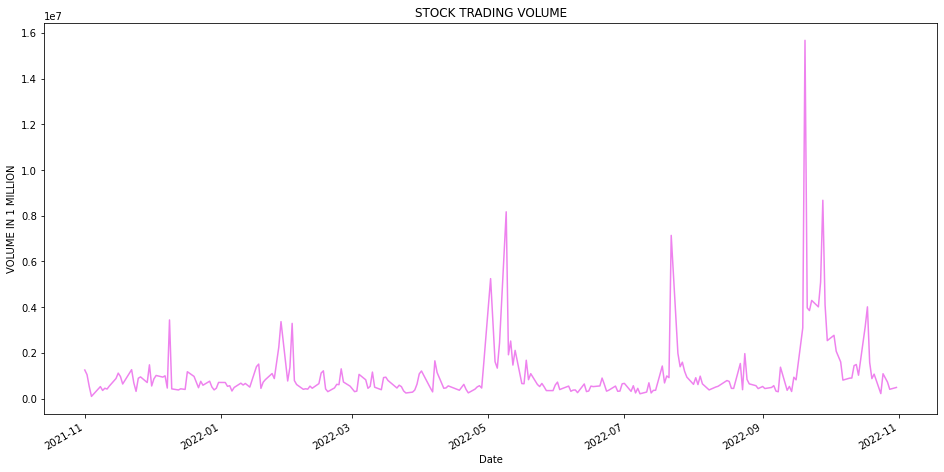

In [110]:
cfhome_stock_volume.plot(figsize = (16,8), color = 'violet')
plt.title('STOCK TRADING VOLUME')
plt.ylabel('VOLUME IN 1 MILLION')

# DAILY RETURNS 

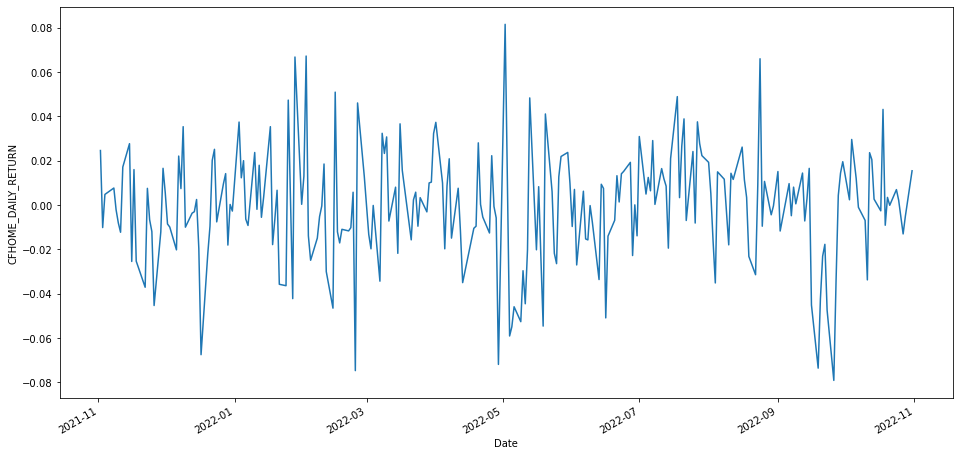

min: -0.07919762170852367
max: 0.08145118594439586
annualized mean: -0.1898084826427483
annualised std dev0.40177922322820403


In [12]:
cfhome_daily_return  = np.log(cfhome['Adj Close']/cfhome['Adj Close'].shift(1))
cfhome_daily_return.plot(figsize = (16,8))
plt.ylabel("CFHOME_DAILY_RETURN")
plt.show()
print( 'min: ' + str(cfhome_daily_return.min())) 
print( 'max: ' + str(cfhome_daily_return.max())) 
print('annualized mean: '+ str(cfhome_daily_return.mean()*len(cfhome_daily_return))) 
print('annualised std dev' + str(cfhome_daily_return.std() * len(cfhome_daily_return) ** 0.5))

## monthly returns

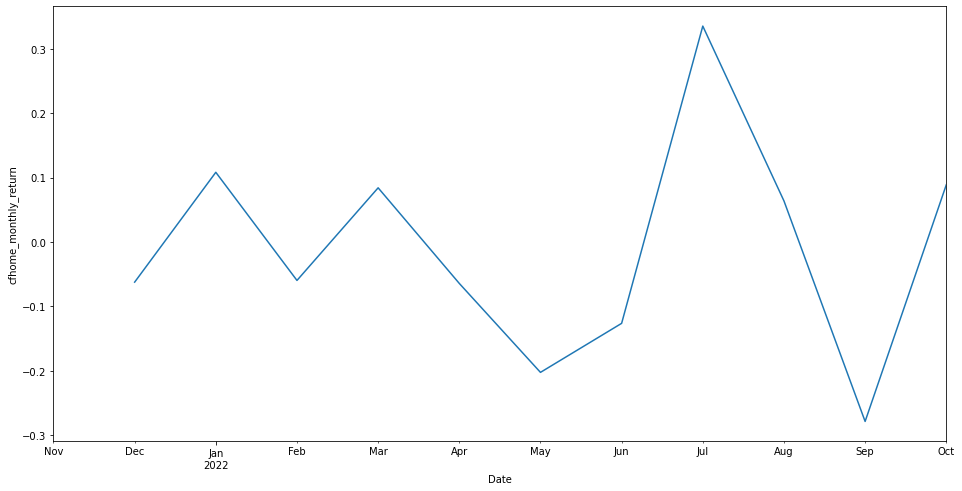

min: -0.27844296990395906
max: 0.3351477405951003
annualized mean: -0.12322691165804461
annualised std dev0.5877233250113324


In [13]:
cfhome_monthly = cfhome['Adj Close'].resample('M').ffill()
cfhome_monthly_return  = np.log(cfhome_monthly/cfhome_monthly.shift(1))
cfhome_monthly_return.plot(figsize = (16,8))
plt.ylabel("cfhome_monthly_return")
plt.show()
print( 'min: ' + str(cfhome_monthly_return.min())) 
print( 'max: ' + str(cfhome_monthly_return.max())) 
print('annualized mean: '+ str(cfhome_monthly_return.mean()*len(cfhome_monthly_return))) 
print('annualised std dev' + str(cfhome_monthly_return.std() * len(cfhome_monthly_return) ** 0.5))

# Weekly Returns

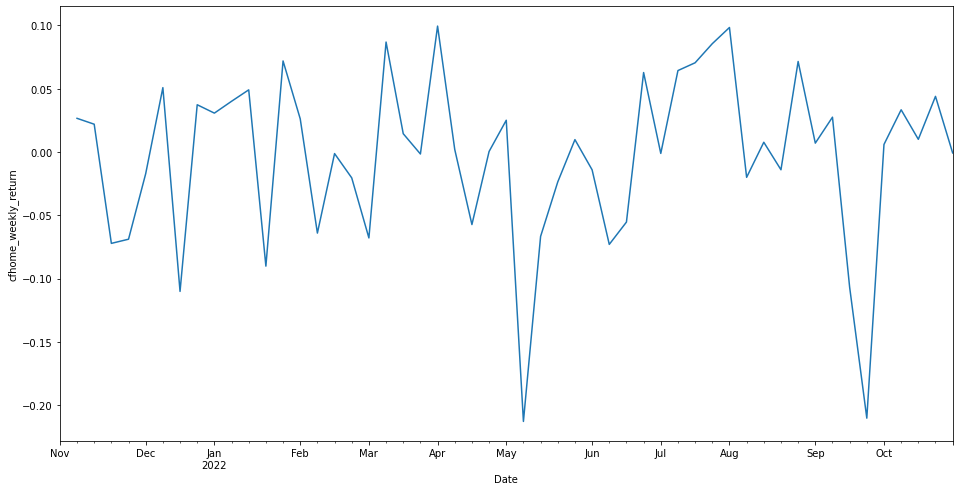

min: -0.21282568636750535
max: 0.09943566795229196
annualized mean: -0.1926785705859338
annualised std dev0.48979675476111706


In [14]:
cfhome_weekly = cfhome['Adj Close'].resample('W-MON').ffill()
cfhome_weekly_return  = np.log(cfhome_weekly/cfhome_weekly.shift(1))
cfhome_weekly_return.plot(figsize = (16,8))
plt.ylabel("cfhome_weekly_return")
plt.show()
print( 'min: ' + str(cfhome_weekly_return.min())) 
print( 'max: ' + str(cfhome_weekly_return.max())) 
print('annualized mean: '+ str(cfhome_weekly_return.mean()*len(cfhome_weekly_return))) 
print('annualised std dev' + str(cfhome_weekly_return.std() * len(cfhome_weekly_return) ** 0.5))

# RISK

In [15]:
risk_cfhome_daily = cfhome_daily_return.std() * len(cfhome_daily_return) ** 0.5  
cf_dailypercent = risk_cfhome_daily*100 
print(str(cf_dailypercent) + ' %')

40.1779223228204 %


In [16]:
risk_cfhome_weekly = cfhome_weekly_return.std() * len(cfhome_weekly_return) ** 0.5  
cf_weeklypercent = risk_cfhome_weekly*100 
print(str(cf_weeklypercent) + ' %')

48.97967547611171 %


In [17]:
risk_cfhome_monthly = cfhome_monthly_return.std() * len(cfhome_monthly_return) ** 0.5  
cf_monthlypercent = risk_cfhome_monthly*100 
print(str(cf_monthlypercent) + ' %')

58.77233250113324 %


# RISK ADJUSTED RETURN

## DAILY

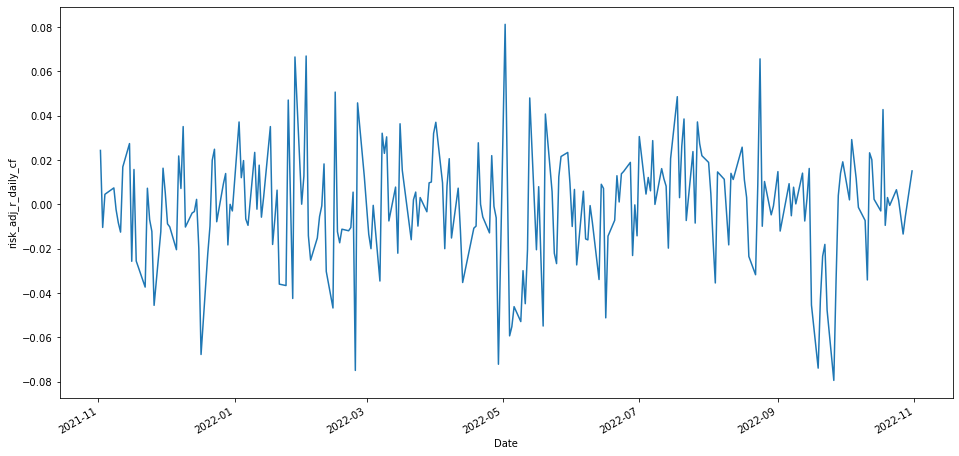

annualized mean-0.23566255146865928
min: -0.07943713783755592
max: 0.08128868594439587
annualised std dev0.4017725060440291
sharpe ratio
-0.5864494899780917


In [18]:
risk_adj_r_daily_cf = cfhome_daily_return - Rfd/len(cfhome_daily_return)                                       
risk_adj_r_daily_cf.plot(figsize = (16,8))
plt.ylabel("risk_adj_r_daily_cf")
plt.show()
print('annualized mean' + str(risk_adj_r_daily_cf.mean()*len(cfhome_daily_return))) 
print('min: ' + str(risk_adj_r_daily_cf.min())) 
print('max: ' + str(risk_adj_r_daily_cf.max())) 
print('annualised std dev' + str(risk_adj_r_daily_cf.std() * len(risk_adj_r_daily_cf) ** 0.5)) 
reward_risk_daily_cf = (cfhome_daily_return.mean()*len(cfhome_daily_return) - avgRfd)/risk_cfhome_daily 
print('sharpe ratio')
print(reward_risk_daily_cf)

## WEEKLY

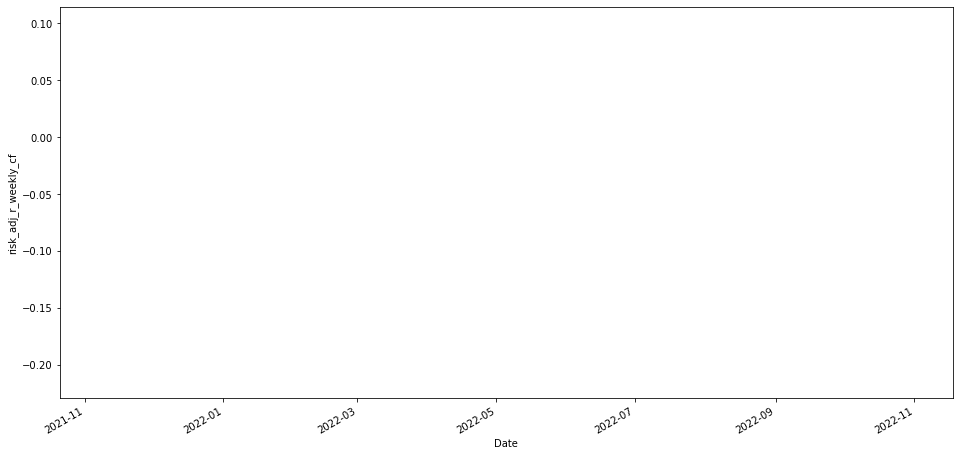

annualized mean: -0.25025458493528296
min: -0.2136973844807129
max: 0.09872812078248064
annualised std dev: 1.07189713574176
sharpe ratio
-0.4869230066774885


In [19]:
risk_adj_r_weekly_cf = cfhome_weekly_return - Rfd/len(cfhome_weekly_return)                                       
risk_adj_r_weekly_cf.plot(figsize = (16,8))
plt.ylabel("risk_adj_r_weekly_cf")
plt.show()
print('annualized mean: ' + str(risk_adj_r_weekly_cf.mean()*len(cfhome_weekly_return))) 
print('min: ' + str(risk_adj_r_weekly_cf.min())) 
print('max: ' + str(risk_adj_r_weekly_cf.max())) 
print('annualised std dev: ' + str(risk_adj_r_weekly_cf.std() * len(risk_adj_r_weekly_cf) ** 0.5)) 
reward_risk_weekly_cf = (cfhome_weekly_return.mean()*len(cfhome_weekly_return) - avgRfd)/risk_cfhome_weekly 
print('sharpe ratio')
print(reward_risk_weekly_cf)

## MONTHLY

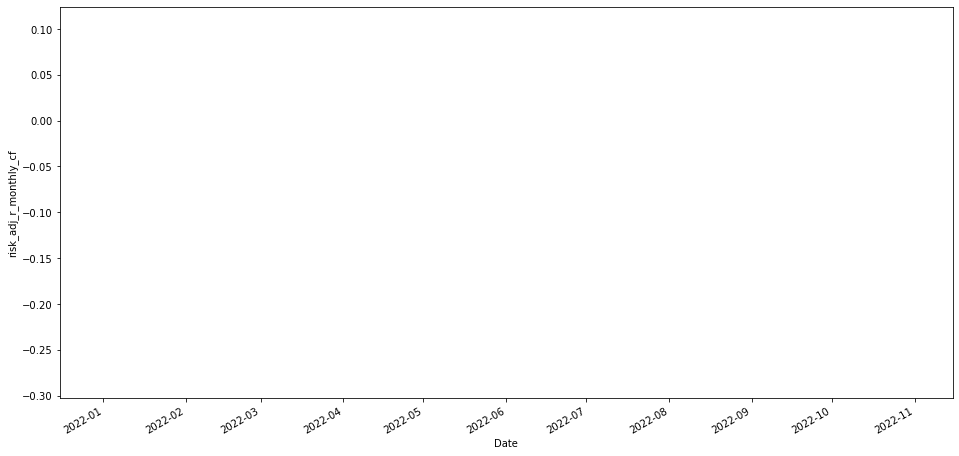

annualized mean-0.7184169249799253
min: -0.28351796990395906
max: 0.10508953429286515
annualised std dev2.2729586420629793
sharpe ratio
-0.28762113458405103


In [20]:
risk_adj_r_monthly_cf = cfhome_monthly_return - Rfd/len(cfhome_monthly_return)                                       
risk_adj_r_monthly_cf.plot(figsize = (16,8))
plt.ylabel("risk_adj_r_monthly_cf")
plt.show()
print('annualized mean' + str(risk_adj_r_monthly_cf.mean()*len(cfhome_monthly_return))) 
print('min: ' + str(risk_adj_r_monthly_cf.min())) 
print('max: ' + str(risk_adj_r_monthly_cf.max())) 
print('annualised std dev' + str(risk_adj_r_monthly_cf.std() * len(risk_adj_r_monthly_cf) ** 0.5)) 
reward_risk_monthly_cf = (cfhome_monthly_return.mean()*len(cfhome_monthly_return) - avgRfd)/risk_cfhome_monthly 
print('sharpe ratio')
print(reward_risk_monthly_cf)

In [21]:
risk_adj_r_monthly_cf

Date
2021-11-01         NaN
2021-11-02         NaN
2021-11-03         NaN
2021-11-04         NaN
2021-11-08         NaN
                ...   
2022-10-24         NaN
2022-10-25         NaN
2022-10-27         NaN
2022-10-28         NaN
2022-10-31    0.083423
Length: 251, dtype: float64

# CFHOME FUTURES NEAR MONTH

In [22]:
cfhome_near_fut = pd.read_excel('CANFINHOME.xlsx',sheet_name = 'Near')

In [23]:
cfhome_near_volume = cfhome_near_fut['CONTRACTS']

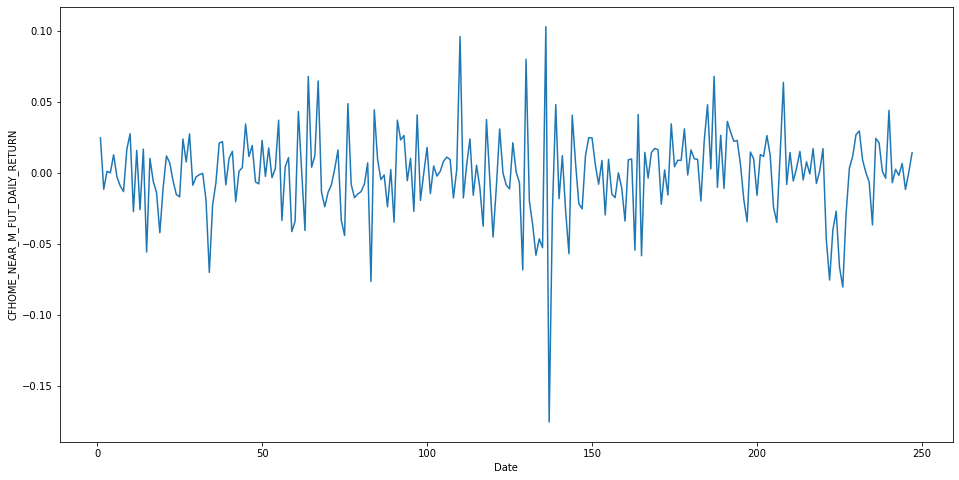

annualized mean: -0.19575495481402683
min: -0.1752614546274717
max: 0.10282304293987204
annualised std dev: 0.47214405954672745


In [24]:
cfhome_near_fut_return_daily  = np.log(cfhome_near_fut['SETTLE_PR']/cfhome_near_fut['SETTLE_PR'].shift(1))
cfhome_near_fut_return_daily.plot(figsize = (16,8))
plt.ylabel("CFHOME_NEAR_M_FUT_DAILY_RETURN")
plt.xlabel('Date')
plt.show()
print('annualized mean: ' + str(cfhome_near_fut_return_daily.mean()*len(cfhome_near_fut_return_daily))) 
print('min: ' + str(cfhome_near_fut_return_daily.min())) 
print('max: ' + str(cfhome_near_fut_return_daily.max())) 
print('annualised std dev: ' + str(cfhome_near_fut_return_daily.std() * len(cfhome_near_fut_return_daily) ** 0.5))

47.21440595467274 %


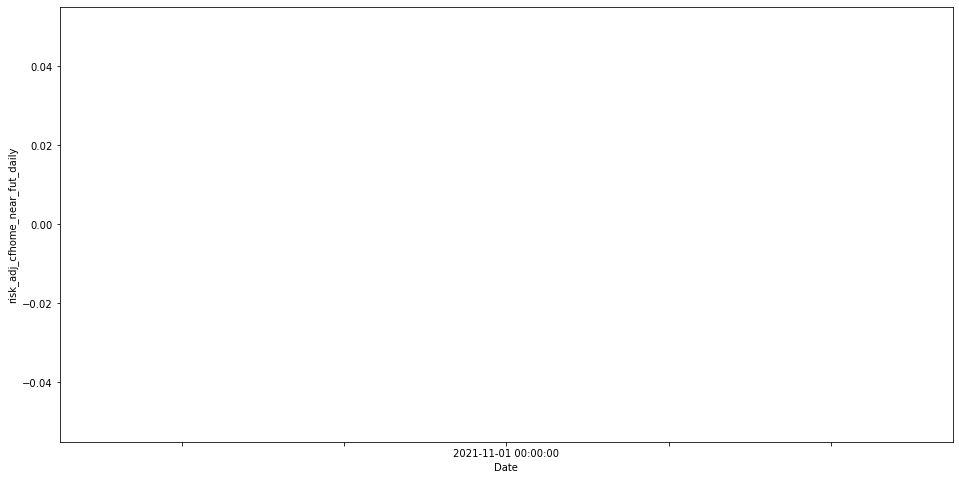

annualized mean: nan
min: nan
max: nan
annualised std dev: nan
sharpe ratio
-0.5116440370957263


In [25]:
cfhome_near_fut_daily_risk = cfhome_near_fut_return_daily.std() * len(cfhome_near_fut_return_daily) ** 0.5 # double star means square root 
print(str(cfhome_near_fut_daily_risk*100)+' %') 
risk_free_daily = Rfd/len(cfhome_near_fut_return_daily)
risk_adj_cfhome_near_fut_daily = cfhome_near_fut_return_daily - risk_free_daily
risk_adj_cfhome_near_fut_daily.plot(figsize = (16,8))
plt.ylabel("risk_adj_cfhome_near_fut_daily")
plt.xlabel('Date')
plt.show()
print('annualized mean: '+ str(risk_adj_cfhome_near_fut_daily.mean()*len(cfhome_daily_return))) #annualized mean
print('min: ' + str(risk_adj_cfhome_near_fut_daily.min())) 
print('max: ' + str(risk_adj_cfhome_near_fut_daily.max()))
print('annualised std dev: ' + str(risk_adj_cfhome_near_fut_daily.std() * len(risk_adj_cfhome_near_fut_daily) ** 0.5)) 
reward_risk_ratio_cfhome_near_fut_daily = (cfhome_near_fut_return_daily.mean()*len(cfhome_near_fut_return_daily) - avgRfd)/cfhome_near_fut_daily_risk 
print('sharpe ratio')
print(reward_risk_ratio_cfhome_near_fut_daily)

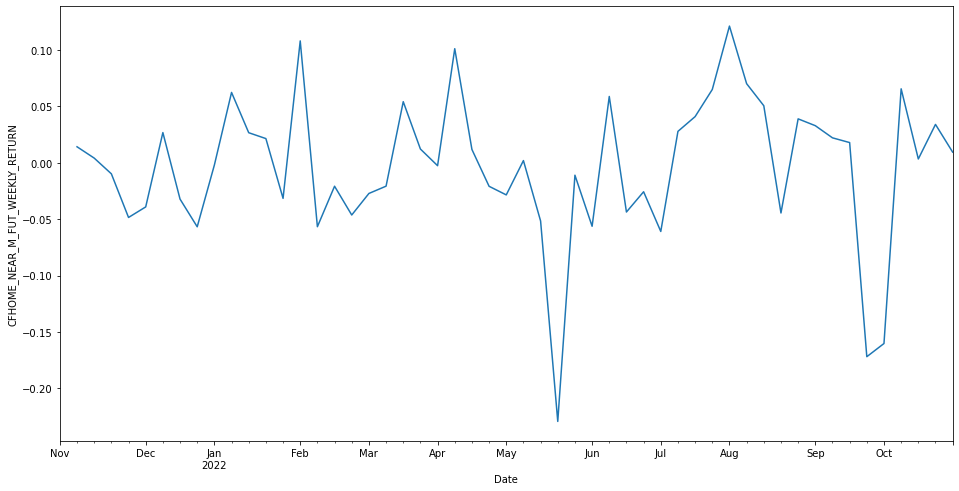

annualized mean: -0.19871495917109322
min: -0.22938629613591913
max: 0.12122732287497127
annualised std dev: 0.4685533972249303


In [26]:
cfhome_near_fut.index = cfhome.index
cfhome_near_fut_weekly = cfhome_near_fut.resample('W-MON').ffill()
cfhome_near_fut_return_weekly  = np.log(cfhome_near_fut_weekly['SETTLE_PR']/cfhome_near_fut_weekly['SETTLE_PR'].shift(1))
cfhome_near_fut_return_weekly.plot(figsize = (16,8))
plt.ylabel("CFHOME_NEAR_M_FUT_WEEKLY_RETURN")
plt.xlabel('Date')
plt.show()
print('annualized mean: ' + str(cfhome_near_fut_return_weekly.mean()*len(cfhome_near_fut_return_weekly))) 
print('min: ' + str(cfhome_near_fut_return_weekly.min())) 
print('max: ' + str(cfhome_near_fut_return_weekly.max())) 
print('annualised std dev: ' + str(cfhome_near_fut_return_weekly.std() * len(cfhome_near_fut_return_weekly) ** 0.5))

46.85533972249303 %


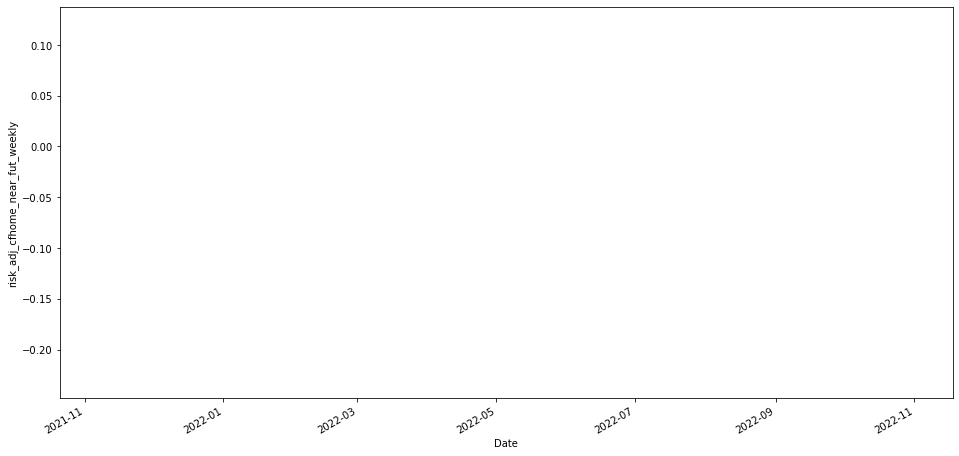

annualized mean-0.30098312169934266
min-0.23030516406044743
max0.12017449268629203
annualised std dev1.0183915778204766
sharpe ratio
-0.5218822412185646


In [27]:
cfhome_near_fut_weekly_risk = cfhome_near_fut_return_weekly.std() * len(cfhome_near_fut_return_weekly) ** 0.5 # double star means square root 
print(str(cfhome_near_fut_weekly_risk*100)+' %') 
risk_adj_cfhome_near_fut_weekly = cfhome_near_fut_return_weekly - Rfd/len(cfhome_near_fut_return_weekly)
risk_adj_cfhome_near_fut_weekly.plot(figsize = (16,8))
plt.ylabel("risk_adj_cfhome_near_fut_weekly")
plt.xlabel('Date')
plt.show()
print('annualized mean'+ str(risk_adj_cfhome_near_fut_weekly.mean()*len(cfhome_weekly_return))) #annualized mean
print('min' + str(risk_adj_cfhome_near_fut_weekly.min())) 
print('max' + str(risk_adj_cfhome_near_fut_weekly.max()))
print('annualised std dev' + str(risk_adj_cfhome_near_fut_weekly.std() * len(risk_adj_cfhome_near_fut_weekly) ** 0.5)) 
reward_risk_ratio_cfhome_near_fut_weekly = (cfhome_near_fut_return_weekly.mean()*len(cfhome_near_fut_return_weekly) - avgRfd)/cfhome_near_fut_weekly_risk 
print('sharpe ratio')
print(reward_risk_ratio_cfhome_near_fut_weekly)

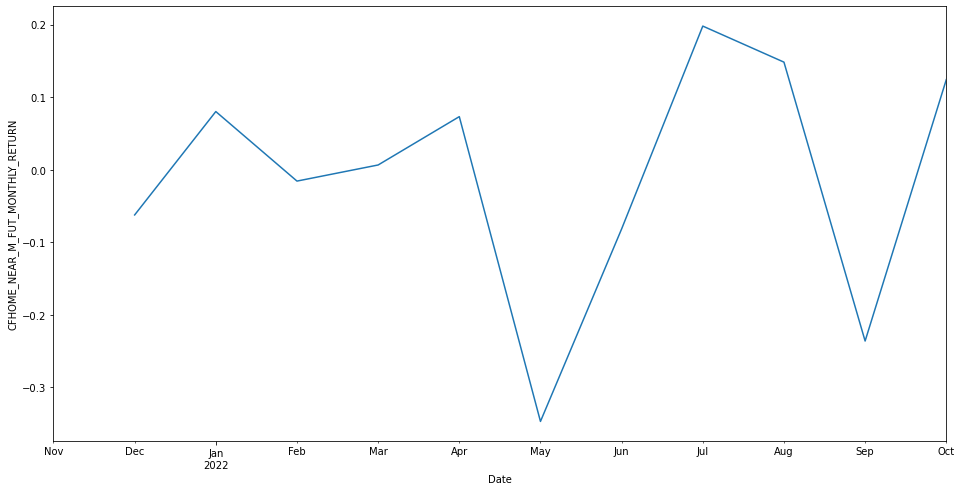

annualized mean: -0.12319464670998456
min: -0.3470177574624844
max: 0.1979395875572945
annualised std dev: 0.5736325834515682


In [28]:
cfhome_near_fut.index = cfhome.index
cfhome_near_fut_monthly = cfhome_near_fut.resample('M').ffill()
cfhome_near_fut_return_monthly  = np.log(cfhome_near_fut_monthly['SETTLE_PR']/cfhome_near_fut_monthly['SETTLE_PR'].shift(1))
cfhome_near_fut_return_monthly.plot(figsize = (16,8))
plt.ylabel("CFHOME_NEAR_M_FUT_MONTHLY_RETURN")
plt.xlabel('Date')
plt.show()
print('annualized mean: ' + str(cfhome_near_fut_return_monthly.mean()*len(cfhome_near_fut_return_monthly))) 
print('min: ' + str(cfhome_near_fut_return_monthly.min())) 
print('max: ' + str(cfhome_near_fut_return_monthly.max())) 
print('annualised std dev: ' + str(cfhome_near_fut_return_monthly.std() * len(cfhome_near_fut_return_monthly) ** 0.5))

57.36325834515682 %


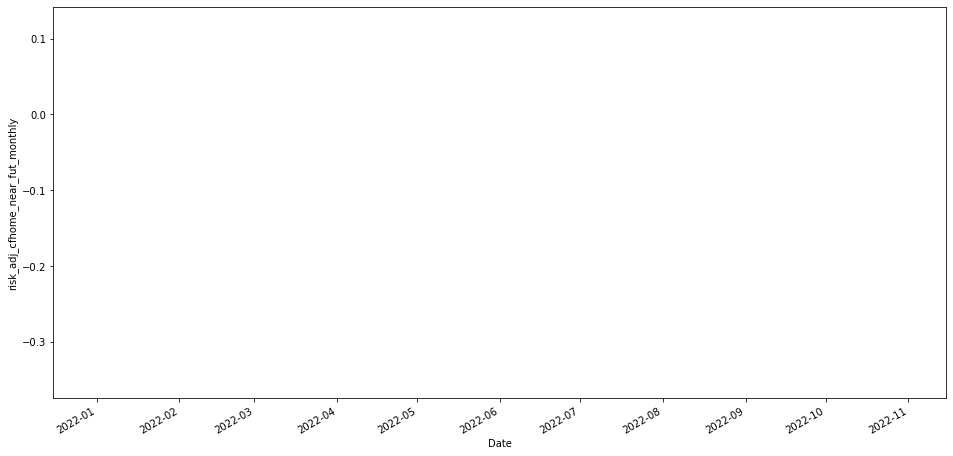

annualized mean-0.8452758956475439
min-0.3511094241291511
max0.11872719092988814
annualised std dev2.496681518966316
sharpe ratio
-0.2946300288527453


In [29]:
cfhome_near_fut_monthly_risk = cfhome_near_fut_return_monthly.std() * len(cfhome_near_fut_return_monthly) ** 0.5 # double star means square root 
print(str(cfhome_near_fut_monthly_risk*100)+' %') 
risk_adj_cfhome_near_fut_monthly = cfhome_near_fut_return_monthly - Rfd/len(cfhome_near_fut_return_monthly)
risk_adj_cfhome_near_fut_monthly.plot(figsize = (16,8))
plt.ylabel("risk_adj_cfhome_near_fut_monthly")
plt.xlabel('Date')
plt.show()
print('annualized mean'+ str(risk_adj_cfhome_near_fut_monthly.mean()*len(cfhome_monthly_return))) #annualized mean
print('min' + str(risk_adj_cfhome_near_fut_monthly.min())) 
print('max' + str(risk_adj_cfhome_near_fut_monthly.max()))
print('annualised std dev' + str(risk_adj_cfhome_near_fut_monthly.std() * len(risk_adj_cfhome_near_fut_monthly) ** 0.5)) 
reward_risk_ratio_cfhome_near_fut_monthly = (cfhome_near_fut_return_monthly.mean()*len(cfhome_near_fut_return_monthly) - avgRfd)/cfhome_near_fut_monthly_risk 
print('sharpe ratio')
print(reward_risk_ratio_cfhome_near_fut_monthly)

# CFHOME FUTURES NEXT MONTH

In [30]:
cfhome_next_fut = pd.read_excel('CANFINHOME.xlsx',sheet_name = 'Next')

In [31]:
cfhome_next_volume = cfhome_next_fut['CONTRACTS']

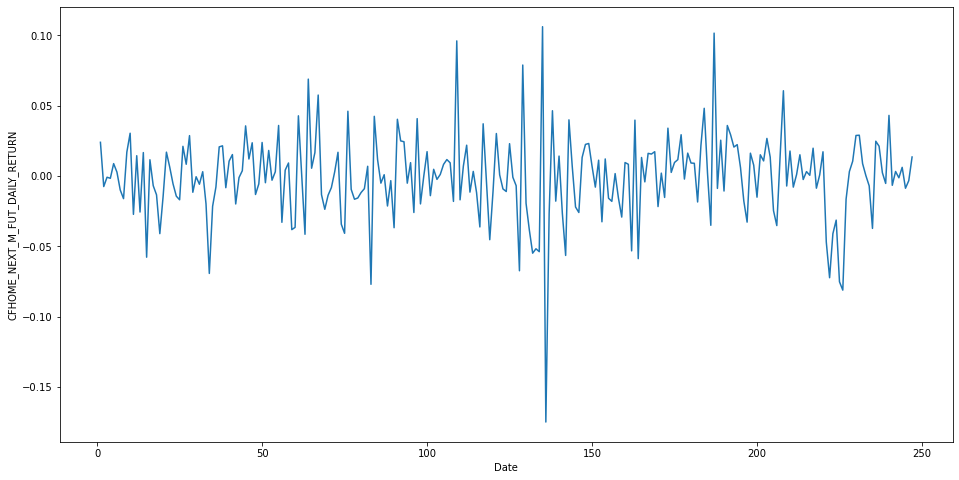

annualized mean: -0.19794829055657331
min: -0.17487081302608243
max: 0.10618026808158117
annualised std dev: 0.479686058181978


In [32]:
cfhome_next_fut_return_daily  = np.log(cfhome_next_fut['SETTLE_PR']/cfhome_next_fut['SETTLE_PR'].shift(1))
cfhome_next_fut_return_daily.plot(figsize = (16,8))
plt.ylabel("CFHOME_NEXT_M_FUT_DAILY_RETURN")
plt.xlabel('Date')
plt.show()
print('annualized mean: ' + str(cfhome_next_fut_return_daily.mean()*len(cfhome_next_fut_return_daily))) 
print('min: ' + str(cfhome_next_fut_return_daily.min())) 
print('max: ' + str(cfhome_next_fut_return_daily.max())) 
print('annualised std dev: ' + str(cfhome_next_fut_return_daily.std() * len(cfhome_next_fut_return_daily) ** 0.5))

47.9686058181978 %


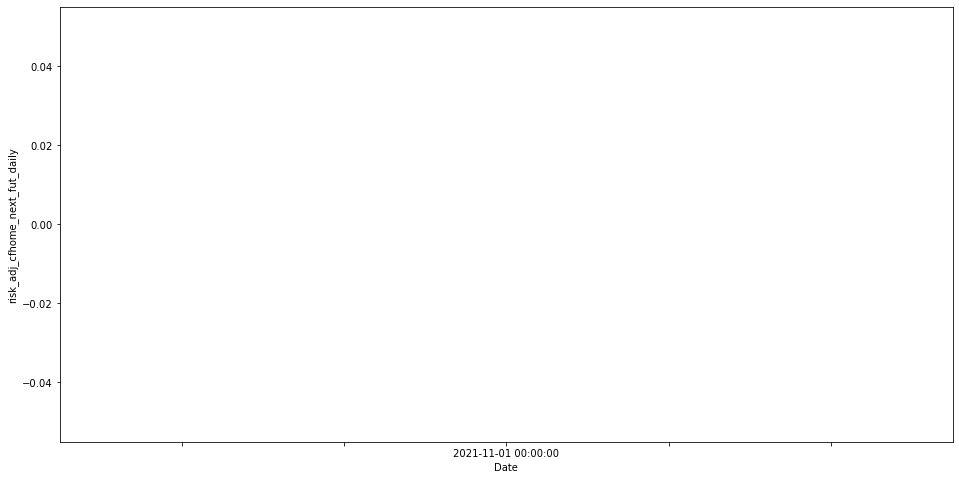

annualized mean: nan
min: nan
max: nan
annualised std dev: nan
sharpe ratio
-0.5081720102178224


In [33]:
cfhome_next_fut_daily_risk = cfhome_next_fut_return_daily.std() * len(cfhome_next_fut_return_daily) ** 0.5 # double star means square root 
print(str(cfhome_next_fut_daily_risk*100)+' %') 
risk_adj_cfhome_next_fut_daily = cfhome_next_fut_return_daily - Rfd/len(cfhome_next_fut_return_daily)
risk_adj_cfhome_next_fut_daily.plot(figsize = (16,8))
plt.ylabel("risk_adj_cfhome_next_fut_daily")
plt.xlabel('Date')
plt.show()
print('annualized mean: '+ str(risk_adj_cfhome_next_fut_daily.mean()*len(cfhome_daily_return))) #annualized mean
print('min: ' + str(risk_adj_cfhome_next_fut_daily.min())) 
print('max: ' + str(risk_adj_cfhome_next_fut_daily.max()))
print('annualised std dev: ' + str(risk_adj_cfhome_next_fut_daily.std() * len(risk_adj_cfhome_next_fut_daily) ** 0.5)) 
reward_risk_ratio_cfhome_next_fut_daily = (cfhome_next_fut_return_daily.mean()*len(cfhome_next_fut_return_daily) - avgRfd)/cfhome_next_fut_daily_risk 
print('sharpe ratio')
print(reward_risk_ratio_cfhome_next_fut_daily)

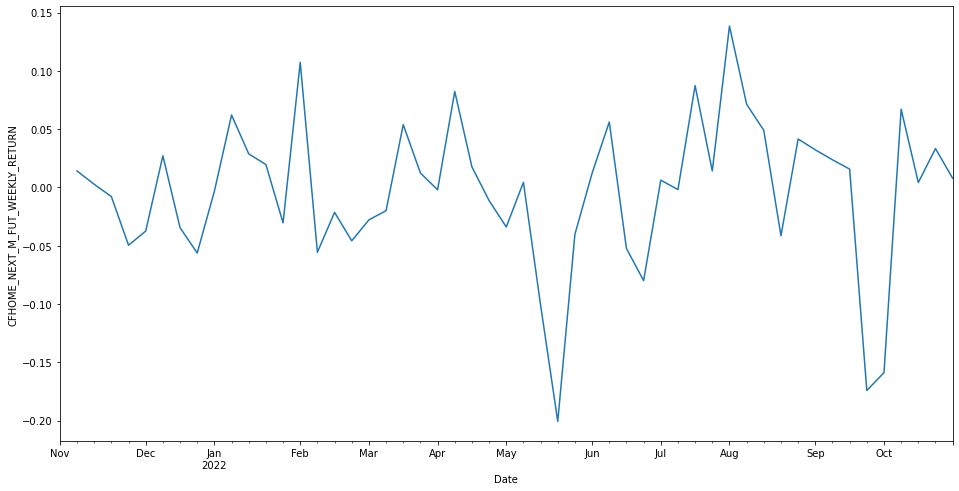

annualized mean: -0.20094146027264836
min: -0.20077652116731368
max: 0.13835487092037488
annualised std dev: 0.46706468472987456


In [34]:
cfhome_next_fut.index = cfhome.index

cfhome_next_fut_weekly = cfhome_next_fut.resample('W-MON').ffill()

cfhome_next_fut_return_weekly  = np.log(cfhome_next_fut_weekly['SETTLE_PR']/cfhome_next_fut_weekly['SETTLE_PR'].shift(1))
cfhome_next_fut_return_weekly.plot(figsize = (16,8))
plt.ylabel("CFHOME_NEXT_M_FUT_WEEKLY_RETURN")
plt.xlabel('Date')
plt.show()
print('annualized mean: ' + str(cfhome_next_fut_return_weekly.mean()*len(cfhome_next_fut_return_weekly))) 
print('min: ' + str(cfhome_next_fut_return_weekly.min())) 
print('max: ' + str(cfhome_next_fut_return_weekly.max())) 
print('annualised std dev: ' + str(cfhome_next_fut_return_weekly.std() * len(cfhome_next_fut_return_weekly) ** 0.5))

46.70646847298745 %


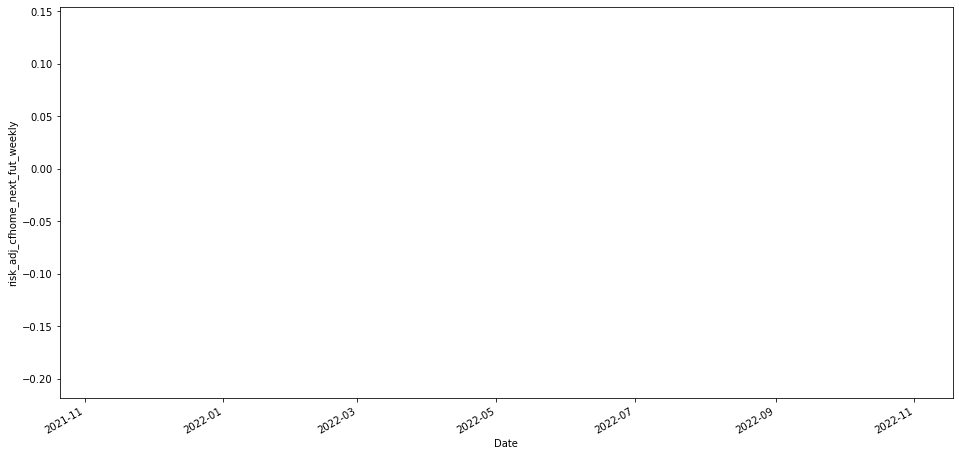

annualized mean-0.3015189998547222
min-0.20169538909184198
max0.13730204073169563
annualised std dev1.0155314124677368
sharpe ratio
-0.5283126861081027


In [35]:
cfhome_next_fut_weekly_risk = cfhome_next_fut_return_weekly.std() * len(cfhome_next_fut_return_weekly) ** 0.5 # double star means square root 
print(str(cfhome_next_fut_weekly_risk*100)+' %') 
risk_adj_cfhome_next_fut_weekly = cfhome_next_fut_return_weekly - Rfd/len(cfhome_next_fut_return_weekly)
risk_adj_cfhome_next_fut_weekly.plot(figsize = (16,8))
plt.ylabel("risk_adj_cfhome_next_fut_weekly")
plt.xlabel('Date')
plt.show()
print('annualized mean'+ str(risk_adj_cfhome_next_fut_weekly.mean()*len(cfhome_weekly_return))) #annualized mean
print('min' + str(risk_adj_cfhome_next_fut_weekly.min())) 
print('max' + str(risk_adj_cfhome_next_fut_weekly.max()))
print('annualised std dev' + str(risk_adj_cfhome_next_fut_weekly.std() * len(risk_adj_cfhome_next_fut_weekly) ** 0.5)) 
reward_risk_ratio_cfhome_next_fut_weekly = (cfhome_next_fut_return_weekly.mean()*len(cfhome_next_fut_return_weekly) - avgRfd)/cfhome_next_fut_weekly_risk 
print('sharpe ratio')
print(reward_risk_ratio_cfhome_next_fut_weekly)

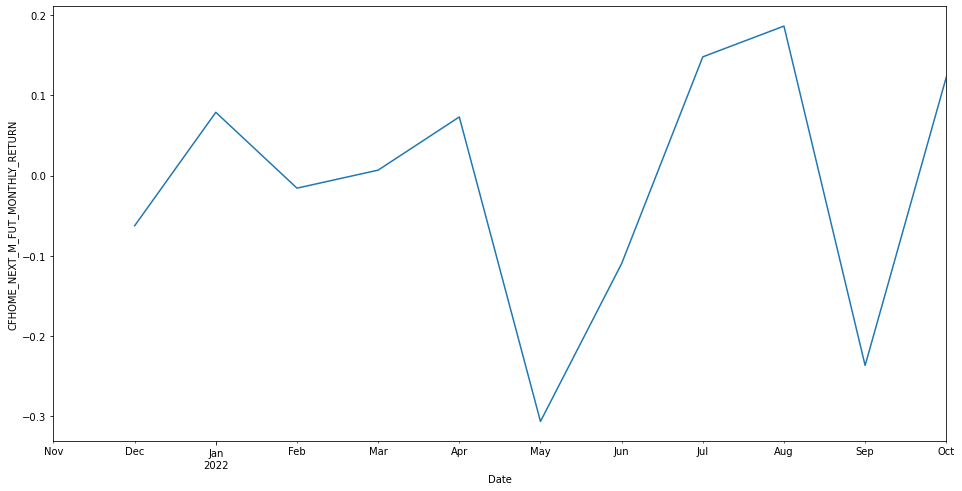

annualized mean: -0.1258918937752066
min: -0.3068680674748178
max: 0.18660459589112494
annualised std dev: 0.5464855273071982


In [36]:
cfhome_next_fut.index = cfhome.index

cfhome_next_fut_monthly = cfhome_next_fut.resample('M').ffill()
cfhome_next_fut_return_monthly  = np.log(cfhome_next_fut_monthly['SETTLE_PR']/cfhome_next_fut_monthly['SETTLE_PR'].shift(1))
cfhome_next_fut_return_monthly.plot(figsize = (16,8))
plt.ylabel("CFHOME_NEXT_M_FUT_MONTHLY_RETURN")
plt.xlabel('Date')
plt.show()
print('annualized mean: ' + str(cfhome_next_fut_return_monthly.mean()*len(cfhome_next_fut_return_monthly))) 
print('min: ' + str(cfhome_next_fut_return_monthly.min())) 
print('max: ' + str(cfhome_next_fut_return_monthly.max())) 
print('annualised std dev: ' + str(cfhome_next_fut_return_monthly.std() * len(cfhome_next_fut_return_monthly) ** 0.5))



54.64855273071982 %


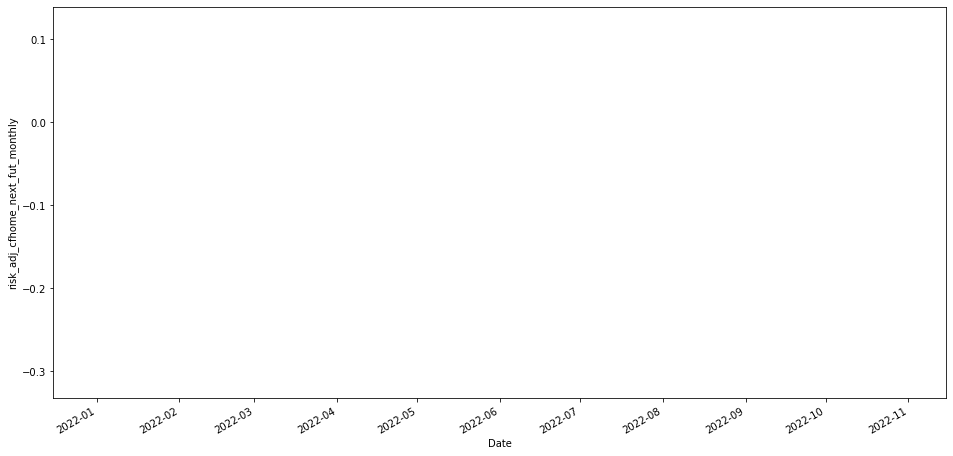

annualized mean-0.8320391297867668
min-0.3109597341414845
max0.11747462078918561
annualised std dev2.3505337439477563
sharpe ratio
-0.3142016084570712


In [37]:
cfhome_next_fut_monthly_risk = cfhome_next_fut_return_monthly.std() * len(cfhome_next_fut_return_monthly) ** 0.5 # double star means square root 
print(str(cfhome_next_fut_monthly_risk*100)+' %') 
risk_adj_cfhome_next_fut_monthly = cfhome_next_fut_return_monthly - Rfd/len(cfhome_next_fut_return_monthly)
risk_adj_cfhome_next_fut_monthly.plot(figsize = (16,8))
plt.ylabel("risk_adj_cfhome_next_fut_monthly")
plt.xlabel('Date')
plt.show()
print('annualized mean'+ str(risk_adj_cfhome_next_fut_monthly.mean()*len(cfhome_monthly_return))) #annualized mean
print('min' + str(risk_adj_cfhome_next_fut_monthly.min())) 
print('max' + str(risk_adj_cfhome_next_fut_monthly.max()))
print('annualised std dev' + str(risk_adj_cfhome_next_fut_monthly.std() * len(risk_adj_cfhome_next_fut_monthly) ** 0.5)) 
reward_risk_ratio_cfhome_next_fut_monthly = (cfhome_next_fut_return_monthly.mean()*len(cfhome_next_fut_return_monthly) - avgRfd)/cfhome_next_fut_monthly_risk 
print('sharpe ratio')
print(reward_risk_ratio_cfhome_next_fut_monthly)

# CFHOME FUT FAR MONTH

In [38]:
cfhome_far_fut = pd.read_excel('CANFINHOME.xlsx',sheet_name = 'Far')

In [39]:
cfhome_far_volume = cfhome_far_fut['CONTRACTS']

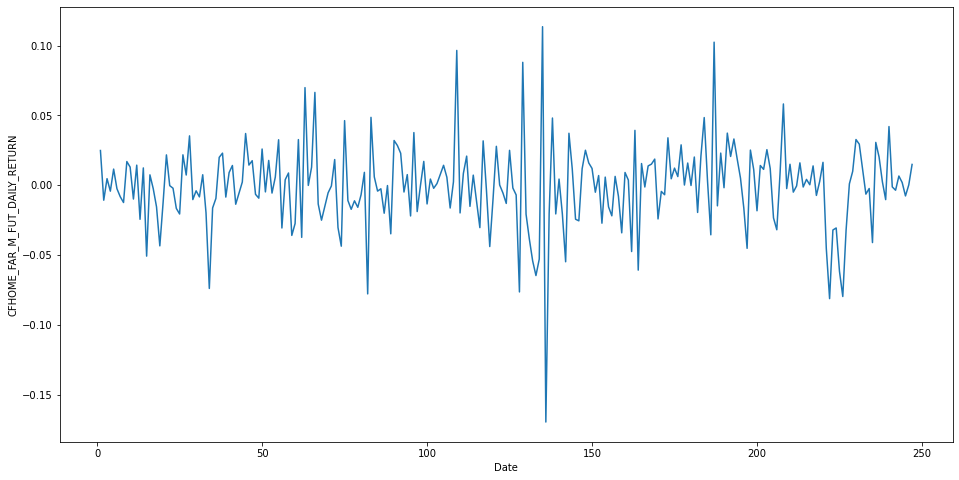

annualized mean: -0.18877855883884562
min: -0.16959700412712464
max: 0.11348886665204368
annualised std dev: 0.4796938973823826


In [40]:
cfhome_far_fut_return_daily  = np.log(cfhome_far_fut['SETTLE_PR']/cfhome_far_fut['SETTLE_PR'].shift(1))
cfhome_far_fut_return_daily.plot(figsize = (16,8))
plt.ylabel("CFHOME_FAR_M_FUT_DAILY_RETURN")
plt.xlabel('Date')
plt.show()
print('annualized mean: ' + str(cfhome_far_fut_return_daily.mean()*len(cfhome_far_fut_return_daily))) 
print('min: ' + str(cfhome_far_fut_return_daily.min())) 
print('max: ' + str(cfhome_far_fut_return_daily.max())) 
print('annualised std dev: ' + str(cfhome_far_fut_return_daily.std() * len(cfhome_far_fut_return_daily) ** 0.5))

47.96938973823826 %


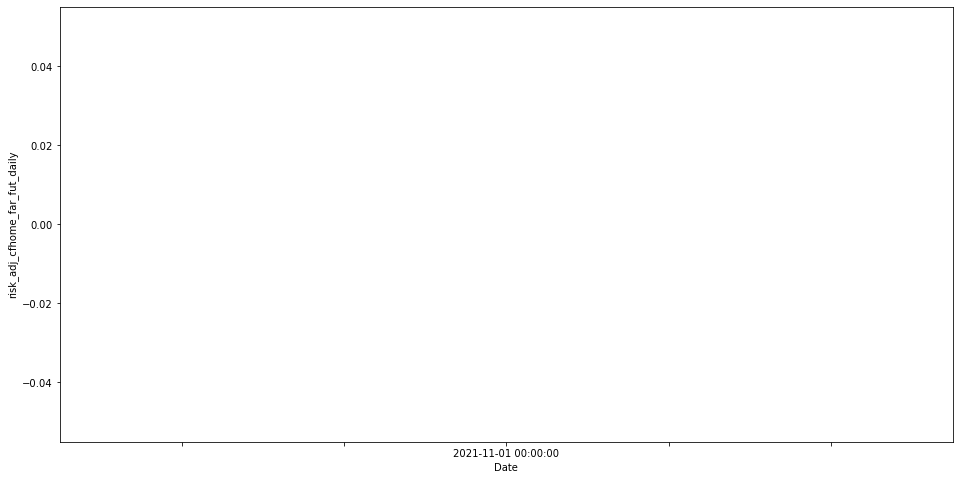

annualized mean: nan
min: nan
max: nan
annualised std dev: nan
sharpe ratio
-0.48904790747226873


In [41]:
cfhome_far_fut_daily_risk = cfhome_far_fut_return_daily.std() * len(cfhome_far_fut_return_daily) ** 0.5 # double star means square root 
print(str(cfhome_far_fut_daily_risk*100)+' %') 
risk_adj_cfhome_far_fut_daily = cfhome_far_fut_return_daily - Rfd/len(cfhome_far_fut_return_daily)
risk_adj_cfhome_far_fut_daily.plot(figsize = (16,8))
plt.ylabel("risk_adj_cfhome_far_fut_daily")
plt.xlabel('Date')
plt.show()
print('annualized mean: '+ str(risk_adj_cfhome_far_fut_daily.mean()*len(cfhome_daily_return))) #annualized mean
print('min: ' + str(risk_adj_cfhome_far_fut_daily.min())) 
print('max: ' + str(risk_adj_cfhome_far_fut_daily.max()))
print('annualised std dev: ' + str(risk_adj_cfhome_far_fut_daily.std() * len(risk_adj_cfhome_far_fut_daily) ** 0.5)) 
reward_risk_ratio_cfhome_far_fut_daily = (cfhome_far_fut_return_daily.mean()*len(cfhome_far_fut_return_daily) - avgRfd)/cfhome_far_fut_daily_risk 
print('sharpe ratio')
print(reward_risk_ratio_cfhome_far_fut_daily)

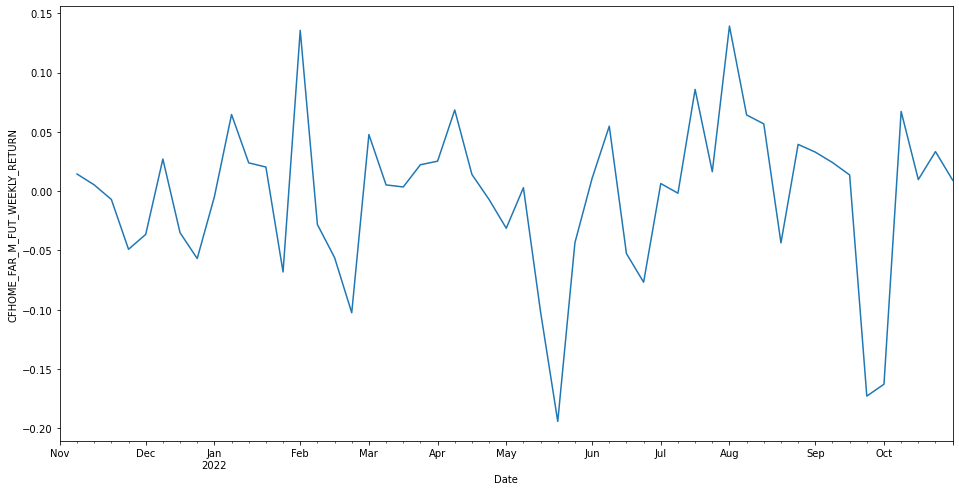

annualized mean: -0.19163307333741766
min: -0.1941991709047234
max: 0.13917817119687556
annualised std dev: 0.48272016728086586


In [42]:
cfhome_far_fut.index = cfhome.index

cfhome_far_fut_weekly = cfhome_far_fut.resample('W-MON').ffill()

cfhome_far_fut_return_weekly  = np.log(cfhome_far_fut_weekly['SETTLE_PR']/cfhome_far_fut_weekly['SETTLE_PR'].shift(1))
cfhome_far_fut_return_weekly.plot(figsize = (16,8))
plt.ylabel("CFHOME_FAR_M_FUT_WEEKLY_RETURN")
plt.xlabel('Date')
plt.show()
print('annualized mean: ' + str(cfhome_far_fut_return_weekly.mean()*len(cfhome_far_fut_return_weekly))) 
print('min: ' + str(cfhome_far_fut_return_weekly.min())) 
print('max: ' + str(cfhome_far_fut_return_weekly.max())) 
print('annualised std dev: ' + str(cfhome_far_fut_return_weekly.std() * len(cfhome_far_fut_return_weekly) ** 0.5))

48.272016728086584 %


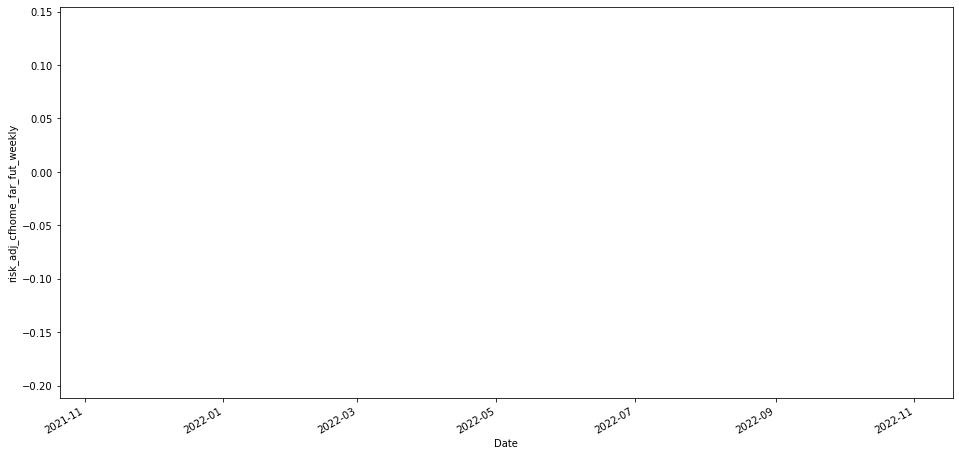

annualized mean-0.300133528901253
min-0.19511803882925172
max0.13812534100819632
annualised std dev1.0479393122307188
sharpe ratio
-0.4918953616091346


In [43]:
cfhome_far_fut_weekly_risk = cfhome_far_fut_return_weekly.std() * len(cfhome_far_fut_return_weekly) ** 0.5 # double star means square root 
print(str(cfhome_far_fut_weekly_risk*100)+' %') 
risk_adj_cfhome_far_fut_weekly = cfhome_far_fut_return_weekly - Rfd/len(cfhome_far_fut_return_weekly)
risk_adj_cfhome_far_fut_weekly.plot(figsize = (16,8))
plt.ylabel("risk_adj_cfhome_far_fut_weekly")
plt.xlabel('Date')
plt.show()
print('annualized mean'+ str(risk_adj_cfhome_far_fut_weekly.mean()*len(cfhome_weekly_return))) #annualized mean
print('min' + str(risk_adj_cfhome_far_fut_weekly.min())) 
print('max' + str(risk_adj_cfhome_far_fut_weekly.max()))
print('annualised std dev' + str(risk_adj_cfhome_far_fut_weekly.std() * len(risk_adj_cfhome_far_fut_weekly) ** 0.5)) 
reward_risk_ratio_cfhome_far_fut_weekly = (cfhome_far_fut_return_weekly.mean()*len(cfhome_far_fut_return_weekly) - avgRfd)/cfhome_far_fut_weekly_risk 
print('sharpe ratio')
print(reward_risk_ratio_cfhome_far_fut_weekly)

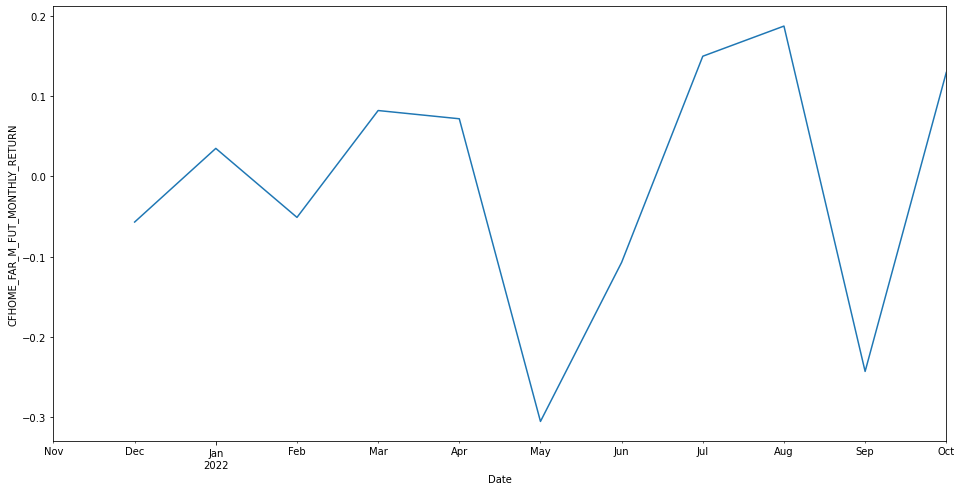

annualized mean: -0.11803805075734658
min: -0.3052206497978853
max: 0.18720858365852028
annualised std dev: 0.5539559315696094


In [44]:
cfhome_far_fut.index = cfhome.index

cfhome_far_fut_monthly = cfhome_far_fut.resample('M').ffill()
cfhome_far_fut_return_monthly  = np.log(cfhome_far_fut_monthly['SETTLE_PR']/cfhome_far_fut_monthly['SETTLE_PR'].shift(1))
cfhome_far_fut_return_monthly.plot(figsize = (16,8))
plt.ylabel("CFHOME_FAR_M_FUT_MONTHLY_RETURN")
plt.xlabel('Date')
plt.show()
print('annualized mean: ' + str(cfhome_far_fut_return_monthly.mean()*len(cfhome_far_fut_return_monthly))) 
print('min: ' + str(cfhome_far_fut_return_monthly.min())) 
print('max: ' + str(cfhome_far_fut_return_monthly.max())) 
print('annualised std dev: ' + str(cfhome_far_fut_return_monthly.std() * len(cfhome_far_fut_return_monthly) ** 0.5))

55.39559315696094 %


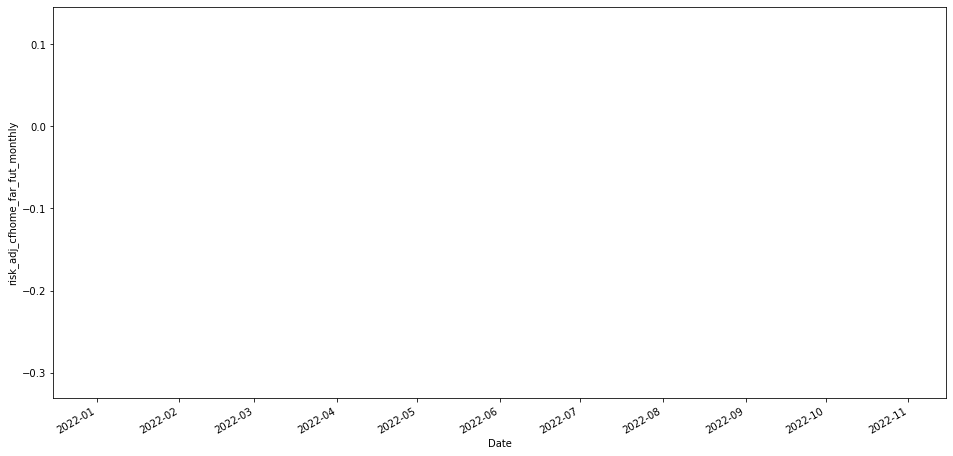

annualized mean-0.8221952013277614
min-0.309312316464552
max0.12406849919499154
annualised std dev2.4040022054885353
sharpe ratio
-0.29578668504605193


In [45]:
cfhome_far_fut_monthly_risk = cfhome_far_fut_return_monthly.std() * len(cfhome_far_fut_return_monthly) ** 0.5 # double star means square root 
print(str(cfhome_far_fut_monthly_risk*100)+' %') 
risk_adj_cfhome_far_fut_monthly = cfhome_far_fut_return_monthly - Rfd/len(cfhome_far_fut_return_monthly)
risk_adj_cfhome_far_fut_monthly.plot(figsize = (16,8))
plt.ylabel("risk_adj_cfhome_far_fut_monthly")
plt.xlabel('Date')
plt.show()
print('annualized mean'+ str(risk_adj_cfhome_far_fut_monthly.mean()*len(cfhome_monthly_return))) #annualized mean
print('min' + str(risk_adj_cfhome_far_fut_monthly.min())) 
print('max' + str(risk_adj_cfhome_far_fut_monthly.max()))
print('annualised std dev' + str(risk_adj_cfhome_far_fut_monthly.std() * len(risk_adj_cfhome_far_fut_monthly) ** 0.5)) 
reward_risk_ratio_cfhome_far_fut_monthly = (cfhome_far_fut_return_monthly.mean()*len(cfhome_far_fut_return_monthly) - avgRfd)/cfhome_far_fut_monthly_risk 
print('sharpe ratio')
print(reward_risk_ratio_cfhome_far_fut_monthly)

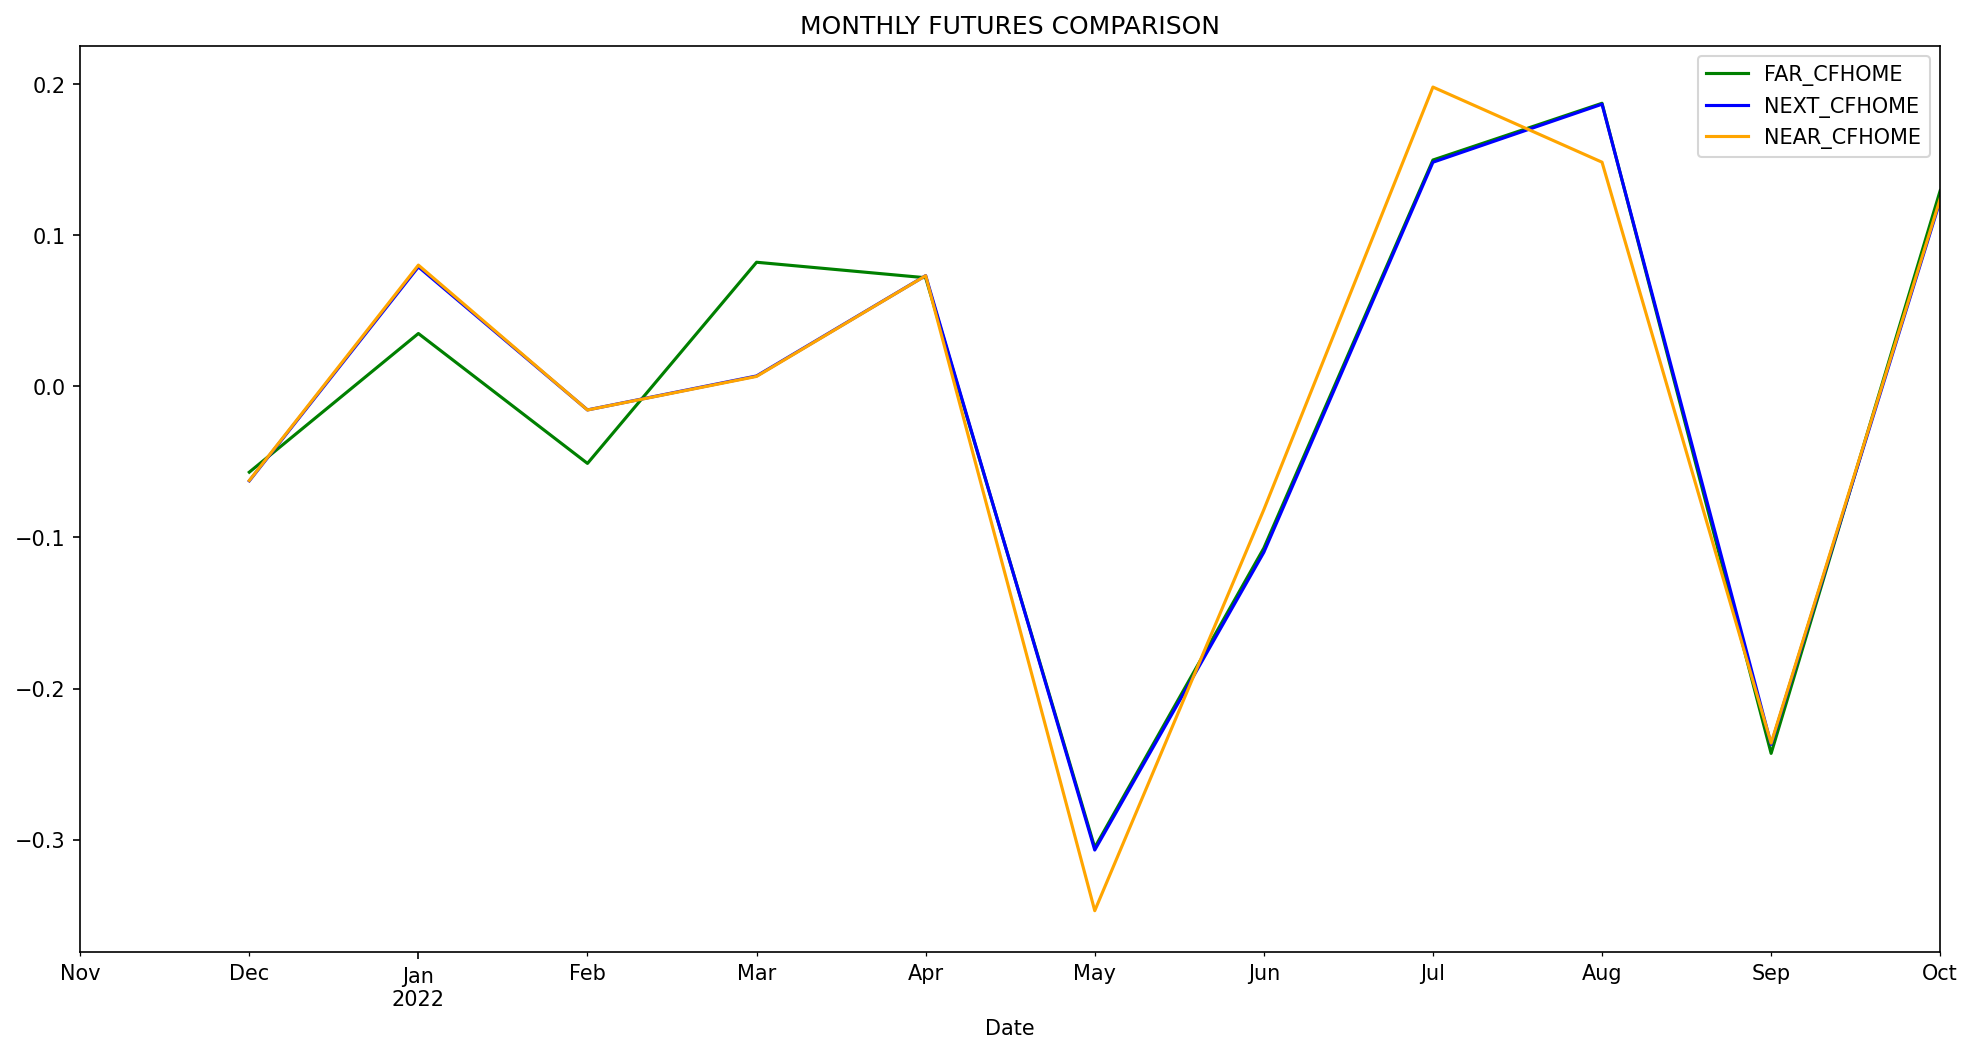

In [46]:
plt.figure(figsize = (16,8), dpi = 150)
cfhome_far_fut_return_monthly.plot(label='FAR_CFHOME', color='green')
cfhome_next_fut_return_monthly.plot(label='NEXT_CFHOME', color='blue')
cfhome_near_fut_return_monthly.plot(label='NEAR_CFHOME', color='orange')
plt.title('MONTHLY FUTURES COMPARISON')
plt.legend()

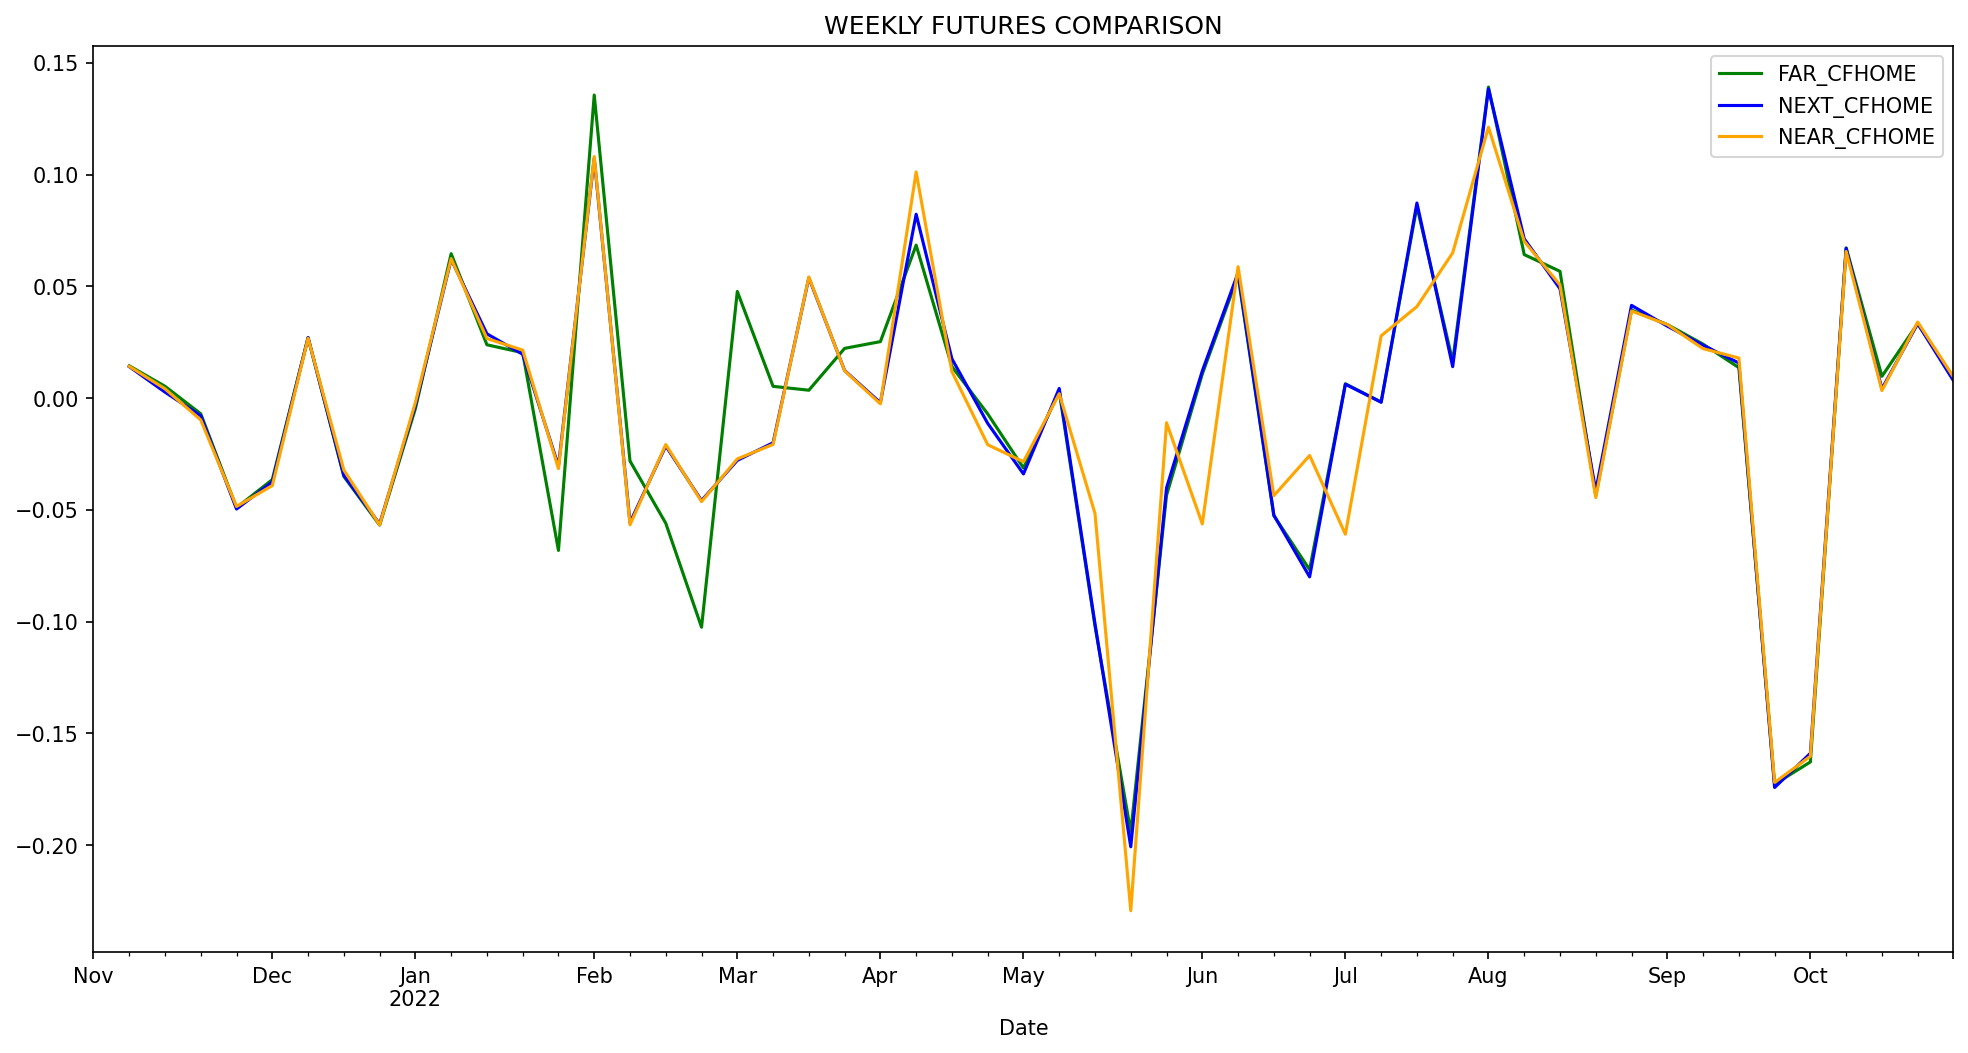

In [47]:
plt.figure(figsize = (16,8), dpi = 150)
cfhome_far_fut_return_weekly.plot(label='FAR_CFHOME', color='green')
cfhome_next_fut_return_weekly.plot(label='NEXT_CFHOME', color='blue')
cfhome_near_fut_return_weekly.plot(label='NEAR_CFHOME', color='orange')
plt.title('WEEKLY FUTURES COMPARISON')
plt.legend()

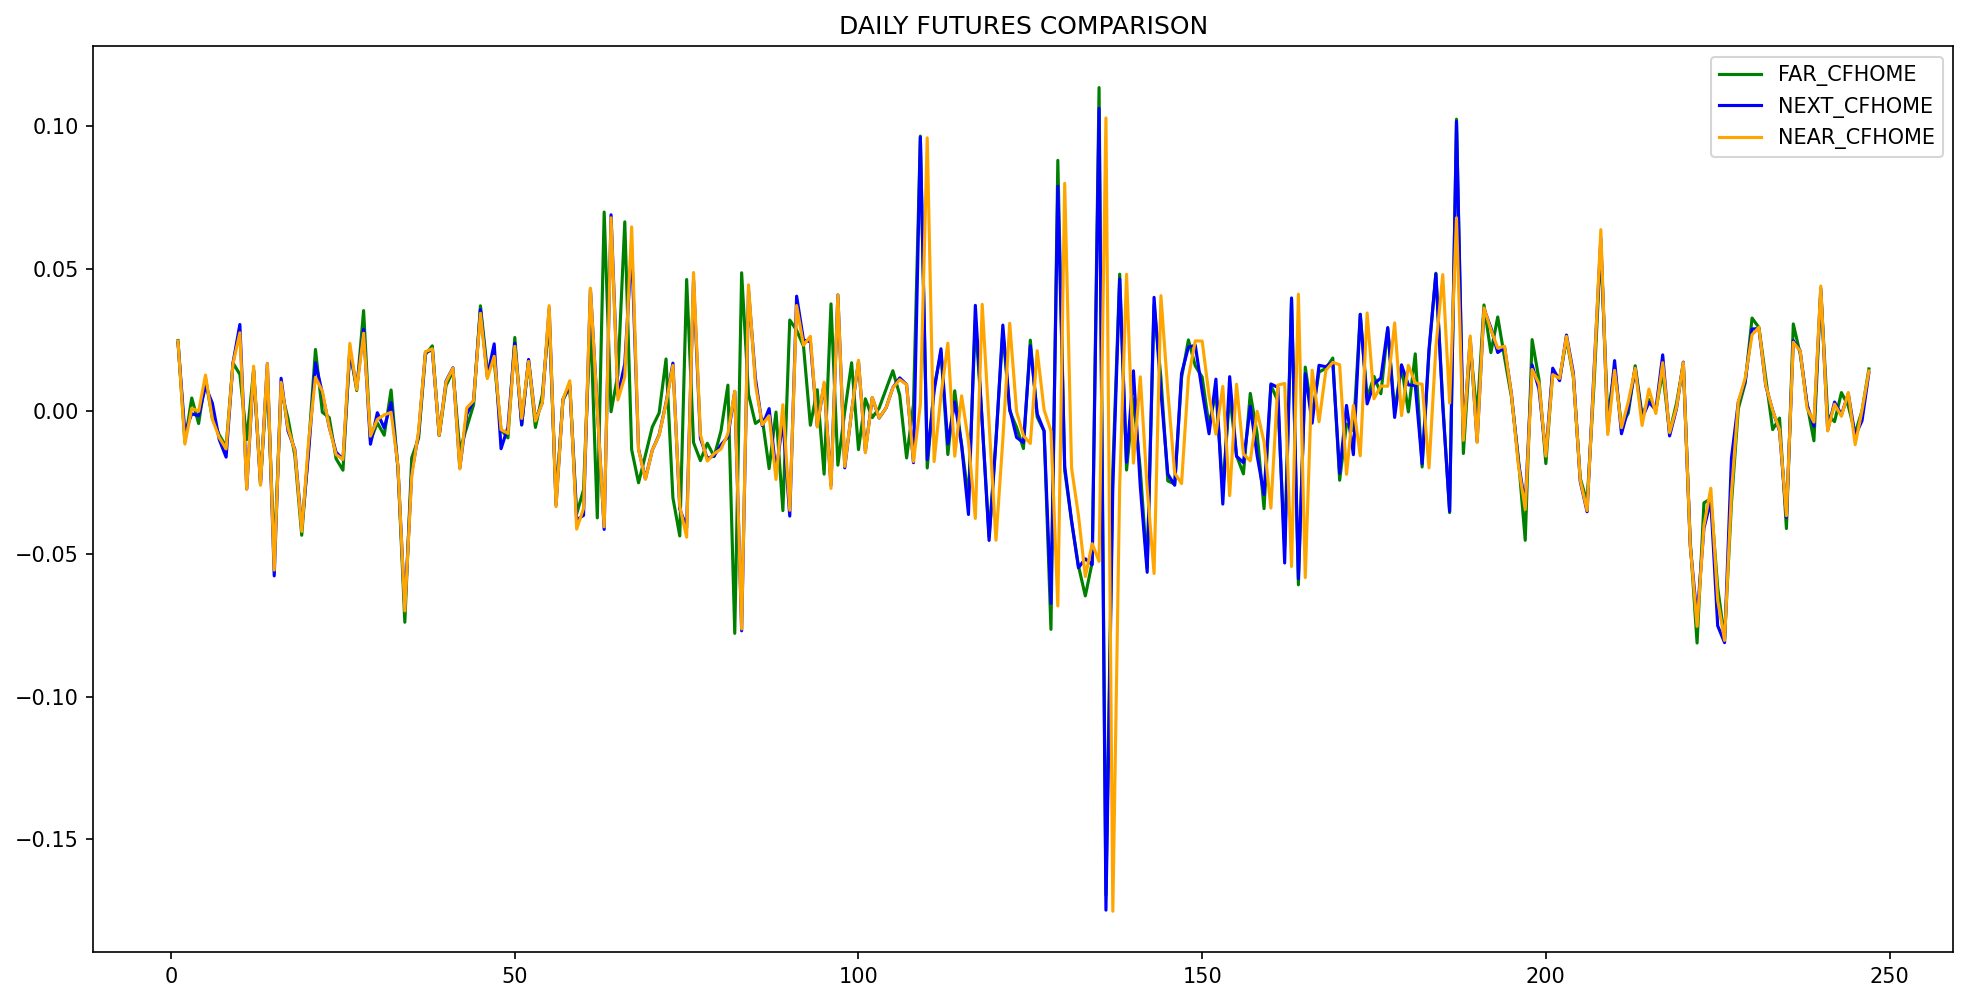

In [48]:
plt.figure(figsize = (16,8), dpi = 150)
cfhome_far_fut_return_daily.plot(label='FAR_CFHOME', color='green')
cfhome_next_fut_return_daily.plot(label='NEXT_CFHOME', color='blue')
cfhome_near_fut_return_daily.plot(label='NEAR_CFHOME', color='orange')
plt.title('DAILY FUTURES COMPARISON')
plt.legend()

Text(0, 0.5, 'Volume')

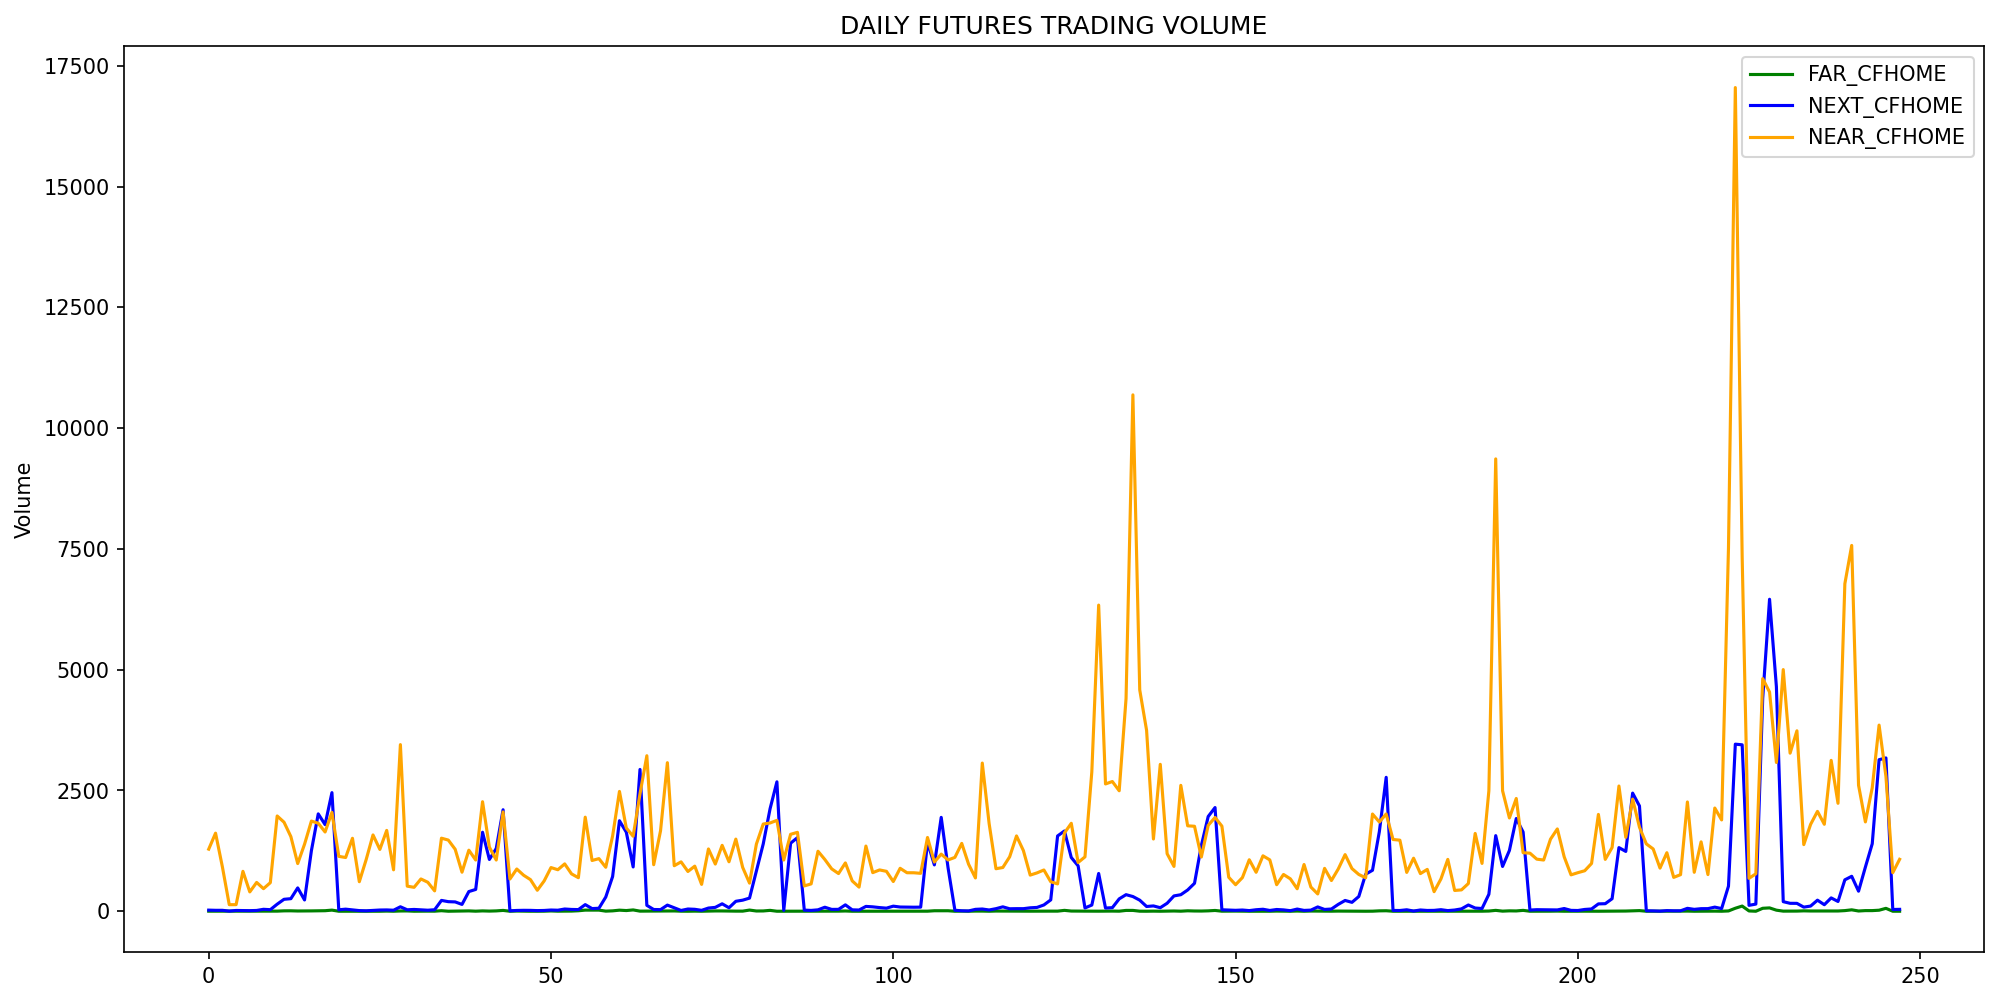

In [49]:
plt.figure(figsize = (16,8), dpi = 150)
cfhome_far_volume.plot(label='FAR_CFHOME', color='green')
cfhome_next_volume.plot(label='NEXT_CFHOME', color='blue')
cfhome_near_volume.plot(label='NEAR_CFHOME', color='orange')
plt.title('DAILY FUTURES TRADING VOLUME')
plt.legend()
plt.ylabel('Volume')

# POWERGRID

In [50]:
power =  wb.DataReader('POWERGRID.NS', data_source='yahoo', start ='2021-11-01', end = '2022-10-31')
power

High         Low        Open       Close      Volume  \
Date                                                                     
2021-11-01  188.500000  184.550003  184.600006  187.750000   4106365.0   
2021-11-02  191.250000  185.149994  188.649994  185.500000   8210168.0   
2021-11-03  187.300003  183.000000  185.500000  183.949997  10468296.0   
2021-11-04  185.850006  184.250000  184.949997  185.050003    622661.0   
2021-11-08  190.350006  184.600006  187.600006  189.149994   8960493.0   
...                ...         ...         ...         ...         ...   
2022-10-24  220.250000  218.600006  219.800003  218.850006    849645.0   
2022-10-25  219.399994  214.250000  218.850006  218.500000  15467016.0   
2022-10-27  224.850006  217.350006  219.300003  223.899994  18223867.0   
2022-10-28  229.000000  223.199997  223.800003  226.800003   8752410.0   
2022-10-31  230.250000  226.699997  227.949997  228.149994   8816762.0   

             Adj Close  
Date                    
2021-11-01  174.106812  
2021-11-02  172.020294  
2021-11-03  170.582932  
2021-11-04  171.603012  
2021-11-08  175.405060  
...                ...  
2022-10-24  213.737885  
2022-10-25  213.396057  
2022-10-27  218.669907  
2022-10-28  221.502182  
2022-10-31  222.820633  

[248 rows x 6 columns]

In [51]:
power_weekly = power['Adj Close'].resample('W-MON').ffill()
power_monthly = power['Adj Close'].resample('M').ffill()
power_monthly

Date
2021-11-30    191.726135
2021-12-31    192.339828
2022-01-31    202.690796
2022-02-28    202.277878
2022-03-31    209.676529
2022-04-30    220.266739
2022-05-31    225.247513
2022-06-30    204.937531
2022-07-31    206.920166
2022-08-31    224.236786
2022-09-30    207.243210
2022-10-31    222.820633
Freq: M, Name: Adj Close, dtype: float64

## daily returns

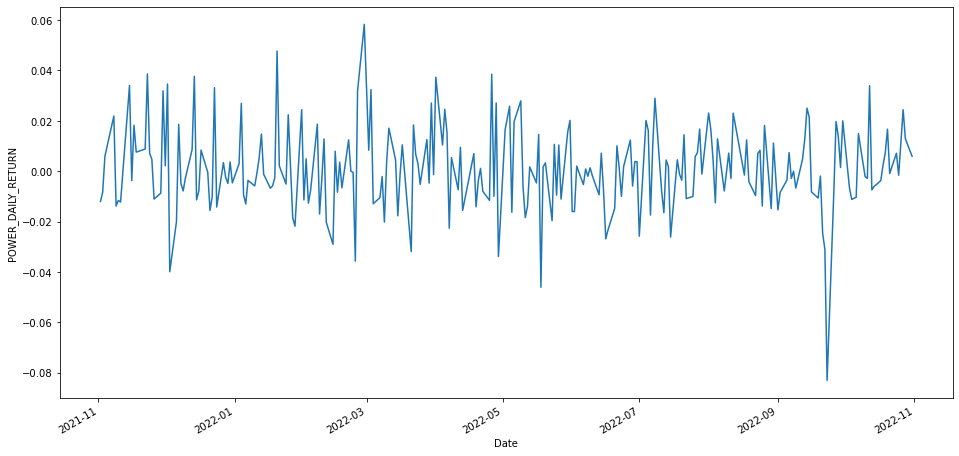

min: -0.08309526968223382
max: 0.058326164768072467
annualized mean: 0.2476969188802345
annualised std dev0.26575849710771904


In [52]:
power_daily_return  = np.log(power['Adj Close']/power['Adj Close'].shift(1))
power_daily_return.plot(figsize = (16,8))
plt.ylabel("POWER_DAILY_RETURN")
plt.show()
print( 'min: ' + str(power_daily_return.min())) 
print( 'max: ' + str(power_daily_return.max())) 
print('annualized mean: '+ str(power_daily_return.mean()*len(power_daily_return))) 
print('annualised std dev' + str(power_daily_return.std() * len(power_daily_return) ** 0.5))

## weekly returns

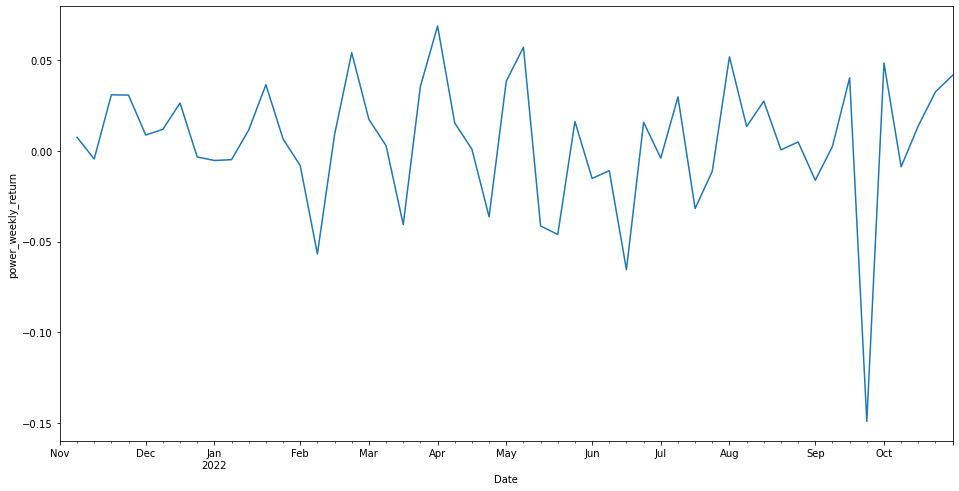

min: -0.14912357638665147
max: 0.0687101996984163
annualized mean: 0.25144233600039834
annualised std dev0.26576522159043825


In [53]:
power_weekly = power['Adj Close'].resample('W-MON').ffill()
power_weekly_return  = np.log(power_weekly/power_weekly.shift(1))
power_weekly_return.plot(figsize = (16,8))
plt.ylabel("power_weekly_return")
plt.show()
print( 'min: ' + str(power_weekly_return.min())) 
print( 'max: ' + str(power_weekly_return.max())) 
print('annualized mean: '+ str(power_weekly_return.mean()*len(power_weekly_return))) 
print('annualised std dev' + str(power_weekly_return.std() * len(power_weekly_return) ** 0.5))

## monthly returns

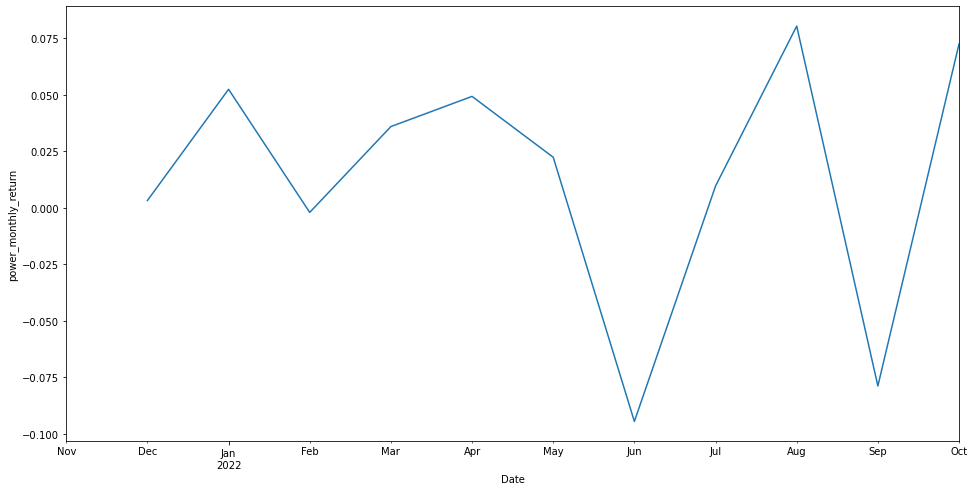

min: -0.09449465103478086
max: 0.08036952594677094
annualized mean: 0.16396269414158862
annualised std dev0.19556494965033477


In [54]:
power_monthly = power['Adj Close'].resample('M').ffill()
power_monthly_return  = np.log(power_monthly/power_monthly.shift(1))
power_monthly_return.plot(figsize = (16,8))
plt.ylabel("power_monthly_return")
plt.show()
print( 'min: ' + str(power_monthly_return.min())) 
print( 'max: ' + str(power_monthly_return.max())) 
print('annualized mean: '+ str(power_monthly_return.mean()*len(power_monthly_return))) 
print('annualised std dev' + str(power_monthly_return.std() * len(power_monthly_return) ** 0.5))

# RISK

## daily

In [55]:
risk_power_daily = power_daily_return.std() * len(power_daily_return) ** 0.5  
cf_dailypercent = risk_power_daily*100 
print(str(cf_dailypercent) + ' %')

26.575849710771905 %


## weekly

In [56]:
risk_power_weekly = power_weekly_return.std() * len(power_weekly_return) ** 0.5  
cf_weeklypercent = risk_power_weekly*100 
print(str(cf_weeklypercent) + ' %')

26.576522159043826 %


## monthly

In [57]:
risk_power_monthly = power_monthly_return.std() * len(power_monthly_return) ** 0.5  
cf_monthlypercent = risk_power_monthly*100 
print(str(cf_monthlypercent) + ' %')

19.556494965033476 %


# RISK ADJUSTED RETURNS

## daily

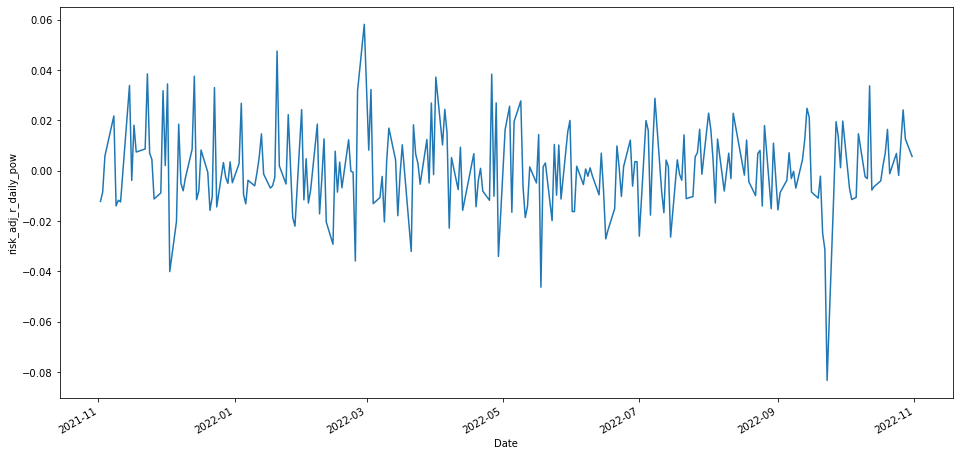

annualized mean0.2018428500543236
min: -0.08333317290804028
max: 0.058175761542266016
annualised std dev0.26578452452601786
sharpe ratio
0.7596452537703073


In [58]:
risk_adj_r_daily_pow = power_daily_return - Rfd/len(power_daily_return)                                       
risk_adj_r_daily_pow.plot(figsize = (16,8))
plt.ylabel("risk_adj_r_daily_pow")
plt.show()
print('annualized mean' + str(risk_adj_r_daily_pow.mean()*len(power_daily_return))) 
print('min: ' + str(risk_adj_r_daily_pow.min())) 
print('max: ' + str(risk_adj_r_daily_pow.max())) 
print('annualised std dev' + str(risk_adj_r_daily_pow.std() * len(risk_adj_r_daily_pow) ** 0.5)) 
reward_risk_daily_pow = (power_daily_return.mean()*len(power_daily_return) - avgRfd)/risk_power_daily 
print('sharpe ratio')
print(reward_risk_daily_pow)

## weekly

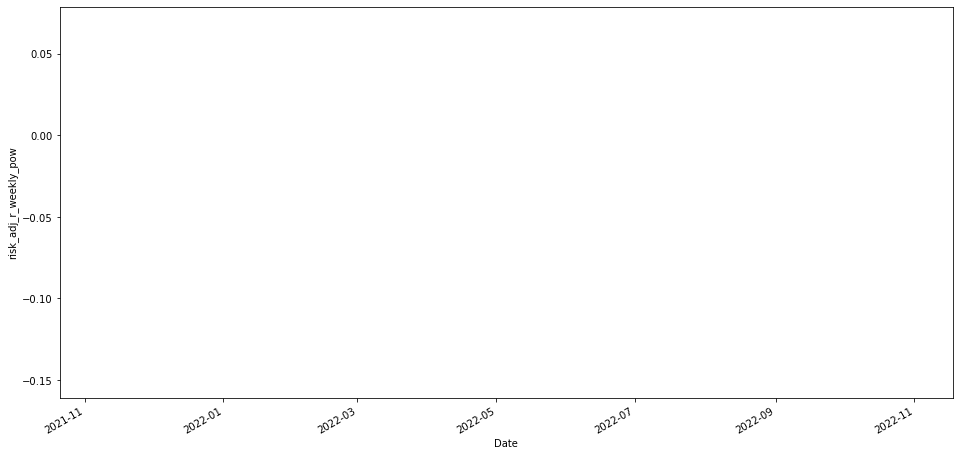

annualized mean0.18215975585370692
min: -0.1502443311036326
max: 0.06800265252860498
annualised std dev0.5798411343808207
sharpe ratio
0.7737189872573254


In [59]:
risk_adj_r_weekly_pow = power_weekly_return - Rfd/len(power_weekly_return)                                       
risk_adj_r_weekly_pow.plot(figsize = (16,8))
plt.ylabel("risk_adj_r_weekly_pow")
plt.show()
print('annualized mean' + str(risk_adj_r_weekly_pow.mean()*len(power_weekly_return))) 
print('min: ' + str(risk_adj_r_weekly_pow.min())) 
print('max: ' + str(risk_adj_r_weekly_pow.max())) 
print('annualised std dev' + str(risk_adj_r_weekly_pow.std() * len(risk_adj_r_weekly_pow) ** 0.5)) 
reward_risk_weekly_pow = (power_weekly_return.mean()*len(power_weekly_return) - avgRfd)/risk_power_weekly 
print('sharpe ratio')
print(reward_risk_weekly_pow)

## monthly

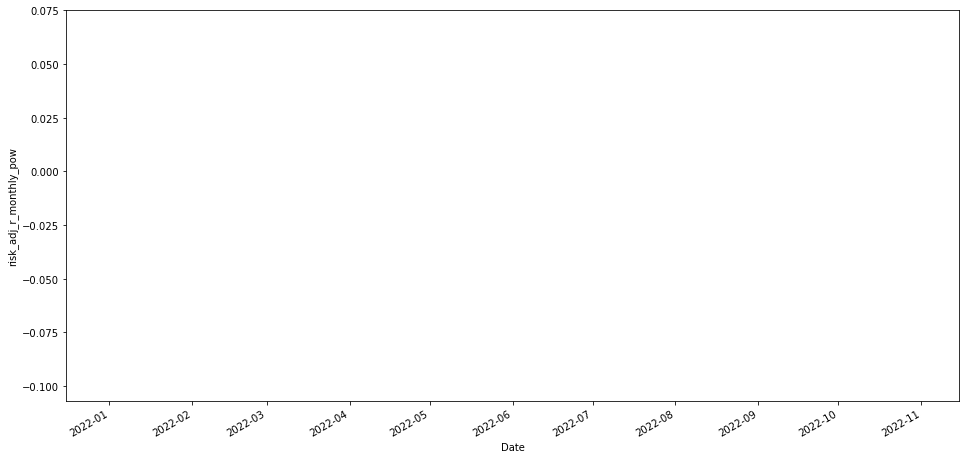

annualized mean-0.03038223540778904
min: -0.09877798436811419
max: 0.06710741418801128
annualised std dev0.9488128331042298
sharpe ratio
0.6041366638020178


In [60]:
risk_adj_r_monthly_pow = power_monthly_return - Rfd/len(power_monthly_return)                                       
risk_adj_r_monthly_pow.plot(figsize = (16,8))
plt.ylabel("risk_adj_r_monthly_pow")
plt.show()
print('annualized mean' + str(risk_adj_r_monthly_pow.mean()*len(power_monthly_return))) 
print('min: ' + str(risk_adj_r_monthly_pow.min())) 
print('max: ' + str(risk_adj_r_monthly_pow.max())) 
print('annualised std dev' + str(risk_adj_r_monthly_pow.std() * len(risk_adj_r_monthly_pow) ** 0.5)) 
reward_risk_monthly_pow = (power_monthly_return.mean()*len(power_monthly_return) - avgRfd)/risk_power_monthly 
print('sharpe ratio')
print(reward_risk_monthly_pow)

# POWERGRID NEAR FUT

In [61]:
power_near_fut = pd.read_excel('POWERGRID.xlsx',sheet_name = 'Near')

## daily

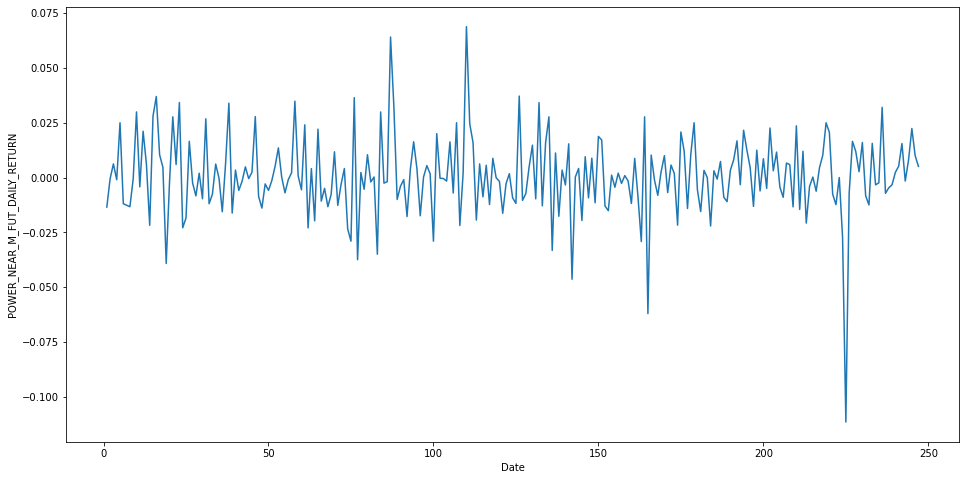

annualized mean: 0.19675795377286323
min: -0.1114717889576212
max: 0.06877891056493408
annualised std dev: 0.286099524459822


In [62]:
power_near_fut_return_daily  = np.log(power_near_fut['SETTLE_PR']/power_near_fut['SETTLE_PR'].shift(1))
power_near_fut_return_daily.plot(figsize = (16,8))
plt.ylabel("POWER_NEAR_M_FUT_DAILY_RETURN")
plt.xlabel('Date')
plt.show()
print('annualized mean: ' + str(power_near_fut_return_daily.mean()*len(power_near_fut_return_daily))) 
print('min: ' + str(power_near_fut_return_daily.min())) 
print('max: ' + str(power_near_fut_return_daily.max())) 
print('annualised std dev: ' + str(power_near_fut_return_daily.std() * len(power_near_fut_return_daily) ** 0.5))

28.609952445982202 %


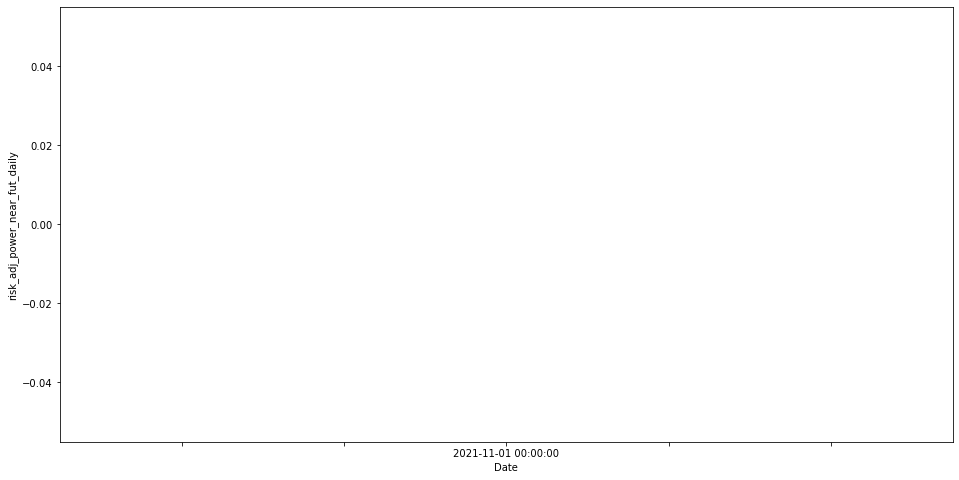

annualized mean: nan
min: nan
max: nan
annualised std dev: nan
sharpe ratio
0.5275898873115217


In [63]:
power_near_fut_daily_risk = power_near_fut_return_daily.std() * len(power_near_fut_return_daily) ** 0.5 # double star means square root 
print(str(power_near_fut_daily_risk*100)+' %') 
risk_free_daily = Rfd/len(power_near_fut_return_daily)
risk_adj_power_near_fut_daily = power_near_fut_return_daily - risk_free_daily
risk_adj_power_near_fut_daily.plot(figsize = (16,8))
plt.ylabel("risk_adj_power_near_fut_daily")
plt.xlabel('Date')
plt.show()
print('annualized mean: '+ str(risk_adj_power_near_fut_daily.mean()*len(power_daily_return))) #annualized mean
print('min: ' + str(risk_adj_power_near_fut_daily.min())) 
print('max: ' + str(risk_adj_power_near_fut_daily.max()))
print('annualised std dev: ' + str(risk_adj_power_near_fut_daily.std() * len(risk_adj_power_near_fut_daily) ** 0.5)) 
reward_risk_ratio_power_near_fut_daily = (power_near_fut_return_daily.mean()*len(power_near_fut_return_daily) - avgRfd)/power_near_fut_daily_risk 
print('sharpe ratio')
print(reward_risk_ratio_power_near_fut_daily)


## weekly

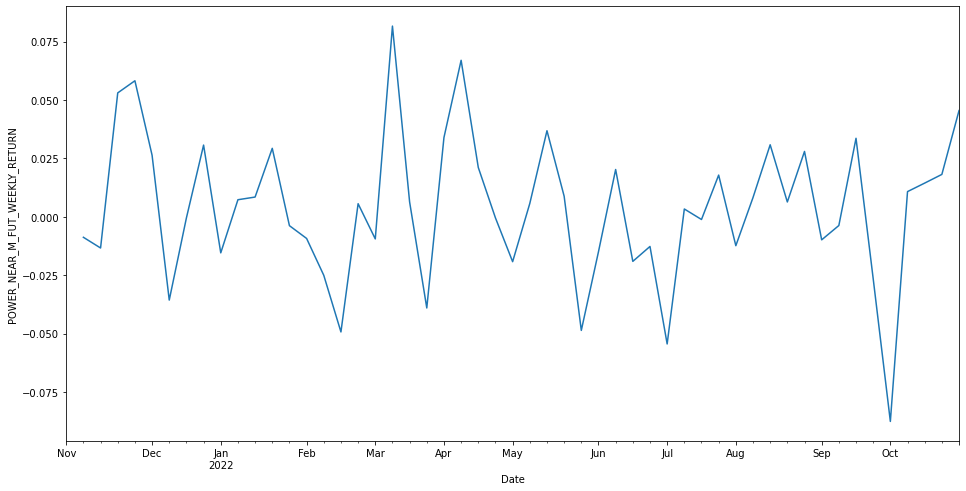

annualized mean: 0.19973312444483135
min: -0.08763217784264224
max: 0.08161501346385848
annualised std dev: 0.22892249948878826


In [64]:
power_near_fut.index = power.index
power_near_fut_weekly = power_near_fut.resample('W-MON').ffill()
power_near_fut_return_weekly  = np.log(power_near_fut_weekly['SETTLE_PR']/power_near_fut_weekly['SETTLE_PR'].shift(1))
power_near_fut_return_weekly.plot(figsize = (16,8))
plt.ylabel("POWER_NEAR_M_FUT_WEEKLY_RETURN")
plt.xlabel('Date')
plt.show()
print('annualized mean: ' + str(power_near_fut_return_weekly.mean()*len(power_near_fut_return_weekly))) 
print('min: ' + str(power_near_fut_return_weekly.min())) 
print('max: ' + str(power_near_fut_return_weekly.max())) 
print('annualised std dev: ' + str(power_near_fut_return_weekly.std() * len(power_near_fut_return_weekly) ** 0.5))

22.892249948878828 %


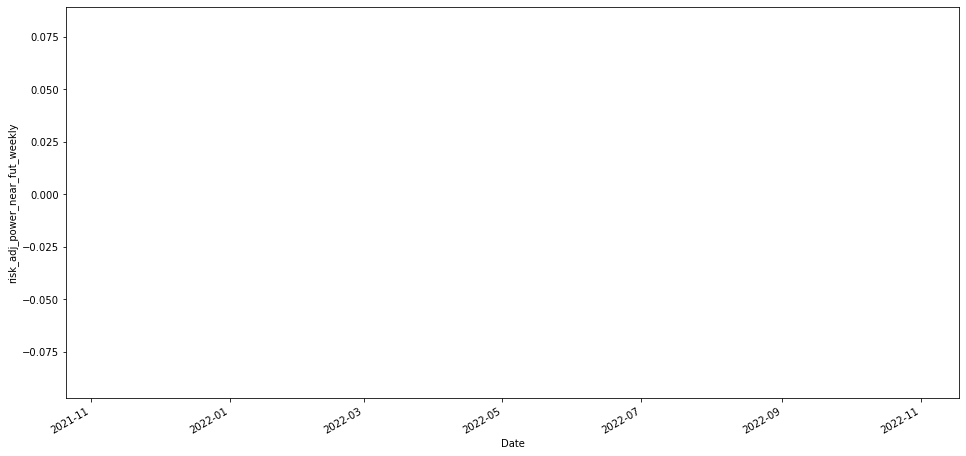

annualized mean: 0.12583175823784304
min: -0.0887604797294347
max: 0.08089237195442452
annualised std dev: 0.4976806937746422
sharpe ratio
0.6723602393182146


In [65]:
power_near_fut_weekly_risk = power_near_fut_return_weekly.std() * len(power_near_fut_return_weekly) ** 0.5 # double star means square root 
print(str(power_near_fut_weekly_risk*100)+' %') 
risk_free_weekly = Rfd/len(power_near_fut_return_weekly)
risk_adj_power_near_fut_weekly = power_near_fut_return_weekly - risk_free_weekly
risk_adj_power_near_fut_weekly.plot(figsize = (16,8))
plt.ylabel("risk_adj_power_near_fut_weekly")
plt.xlabel('Date')
plt.show()
print('annualized mean: '+ str(risk_adj_power_near_fut_weekly.mean()*len(power_weekly_return))) #annualized mean
print('min: ' + str(risk_adj_power_near_fut_weekly.min())) 
print('max: ' + str(risk_adj_power_near_fut_weekly.max()))
print('annualised std dev: ' + str(risk_adj_power_near_fut_weekly.std() * len(risk_adj_power_near_fut_weekly) ** 0.5)) 
reward_risk_ratio_power_near_fut_weekly = (power_near_fut_return_weekly.mean()*len(power_near_fut_return_weekly) - avgRfd)/power_near_fut_weekly_risk 
print('sharpe ratio')
print(reward_risk_ratio_power_near_fut_weekly)


## monthly

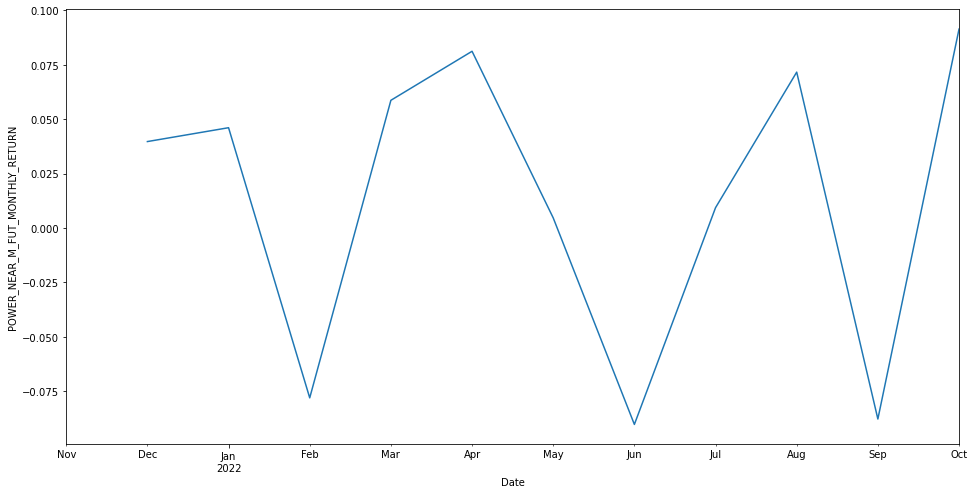

annualized mean: 0.15940072902341698
min: -0.09033678154154405
max: 0.09138038407962079
annualised std dev: 0.23836961060433606


In [66]:
power_near_fut.index = power.index
power_near_fut_monthly = power_near_fut.resample('M').ffill()
power_near_fut_return_monthly  = np.log(power_near_fut_monthly['SETTLE_PR']/power_near_fut_monthly['SETTLE_PR'].shift(1))
power_near_fut_return_monthly.plot(figsize = (16,8))
plt.ylabel("POWER_NEAR_M_FUT_MONTHLY_RETURN")
plt.xlabel('Date')
plt.show()
print('annualized mean: ' + str(power_near_fut_return_monthly.mean()*len(power_near_fut_return_monthly))) 
print('min: ' + str(power_near_fut_return_monthly.min())) 
print('max: ' + str(power_near_fut_return_monthly.max())) 
print('annualised std dev: ' + str(power_near_fut_return_monthly.std() * len(power_near_fut_return_monthly) ** 0.5))

23.836961060433605 %


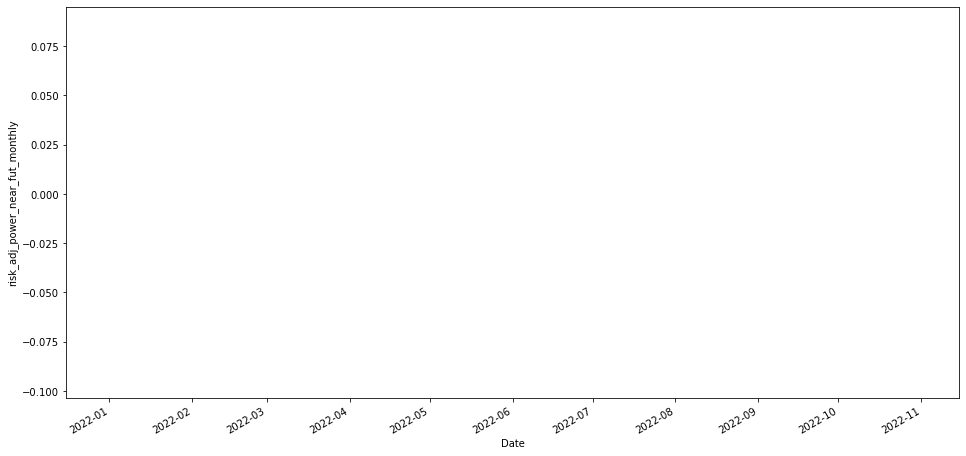

annualized mean: -0.07085453570765954
min: -0.09462011487487738
max: 0.08601371741295412
annualised std dev: 1.1606189063068637
sharpe ratio
0.4765120471196717


In [67]:
power_near_fut_monthly_risk = power_near_fut_return_monthly.std() * len(power_near_fut_return_monthly) ** 0.5 # double star means square root 
print(str(power_near_fut_monthly_risk*100)+' %') 
risk_free_monthly = Rfd/len(power_near_fut_return_monthly)
risk_adj_power_near_fut_monthly = power_near_fut_return_monthly - risk_free_monthly
risk_adj_power_near_fut_monthly.plot(figsize = (16,8))
plt.ylabel("risk_adj_power_near_fut_monthly")
plt.xlabel('Date')
plt.show()
print('annualized mean: '+ str(risk_adj_power_near_fut_monthly.mean()*len(power_monthly_return))) #annualized mean
print('min: ' + str(risk_adj_power_near_fut_monthly.min())) 
print('max: ' + str(risk_adj_power_near_fut_monthly.max()))
print('annualised std dev: ' + str(risk_adj_power_near_fut_monthly.std() * len(risk_adj_power_near_fut_monthly) ** 0.5)) 
reward_risk_ratio_power_near_fut_monthly = (power_near_fut_return_monthly.mean()*len(power_near_fut_return_monthly) - avgRfd)/power_near_fut_monthly_risk 
print('sharpe ratio')
print(reward_risk_ratio_power_near_fut_monthly)

# POWERGRID NEXT FUT

In [68]:
power_next_fut = pd.read_excel('POWERGRID.xlsx',sheet_name = 'Next')

## daily

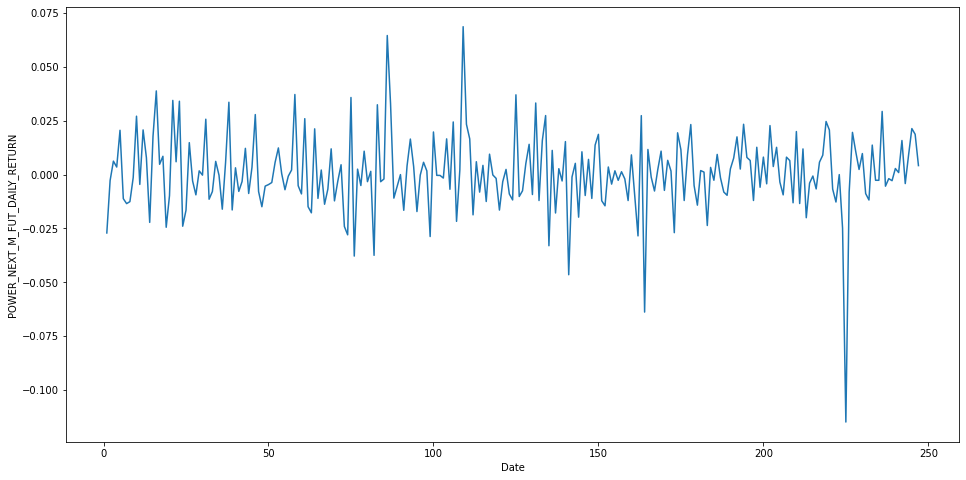

annualized mean: 0.18619880585703683
min: -0.11486125265678139
max: 0.06866545489096351
annualised std dev: 0.286086022252086


In [69]:
power_next_fut_return_daily  = np.log(power_next_fut['SETTLE_PR']/power_next_fut['SETTLE_PR'].shift(1))
power_next_fut_return_daily.plot(figsize = (16,8))
plt.ylabel("POWER_NEXT_M_FUT_DAILY_RETURN")
plt.xlabel('Date')
plt.show()
print('annualized mean: ' + str(power_next_fut_return_daily.mean()*len(power_next_fut_return_daily))) 
print('min: ' + str(power_next_fut_return_daily.min())) 
print('max: ' + str(power_next_fut_return_daily.max())) 
print('annualised std dev: ' + str(power_next_fut_return_daily.std() * len(power_next_fut_return_daily) ** 0.5))

28.6086022252086 %


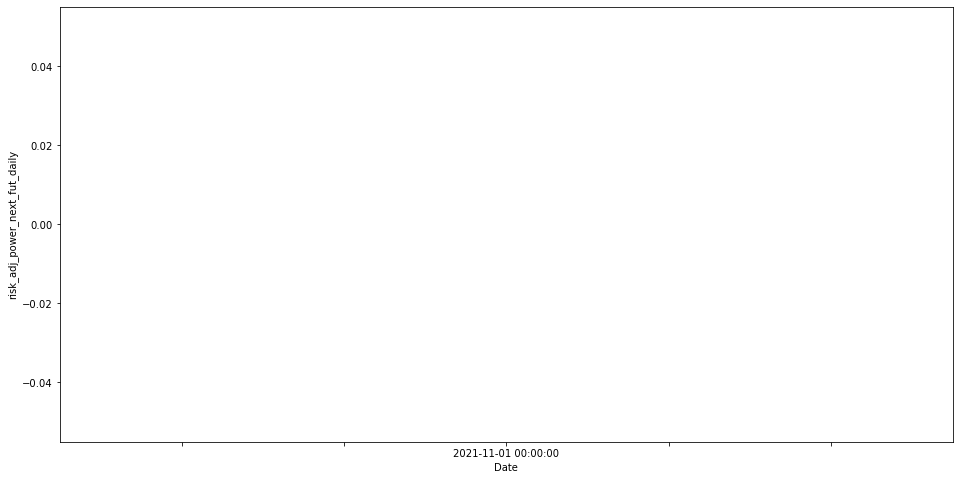

annualized mean: nan
min: nan
max: nan
annualised std dev: nan
sharpe ratio
0.49070579138644865


In [70]:
power_next_fut_daily_risk = power_next_fut_return_daily.std() * len(power_next_fut_return_daily) ** 0.5 # double star means square root 
print(str(power_next_fut_daily_risk*100)+' %') 
risk_free_daily = Rfd/len(power_next_fut_return_daily)
risk_adj_power_next_fut_daily = power_next_fut_return_daily - risk_free_daily
risk_adj_power_next_fut_daily.plot(figsize = (16,8))
plt.ylabel("risk_adj_power_next_fut_daily")
plt.xlabel('Date')
plt.show()
print('annualized mean: '+ str(risk_adj_power_next_fut_daily.mean()*len(power_daily_return))) #annualized mean
print('min: ' + str(risk_adj_power_next_fut_daily.min())) 
print('max: ' + str(risk_adj_power_next_fut_daily.max()))
print('annualised std dev: ' + str(risk_adj_power_next_fut_daily.std() * len(risk_adj_power_next_fut_daily) ** 0.5)) 
reward_risk_ratio_power_next_fut_daily = (power_next_fut_return_daily.mean()*len(power_next_fut_return_daily) - avgRfd)/power_next_fut_daily_risk 
print('sharpe ratio')
print(reward_risk_ratio_power_next_fut_daily)


## weekly

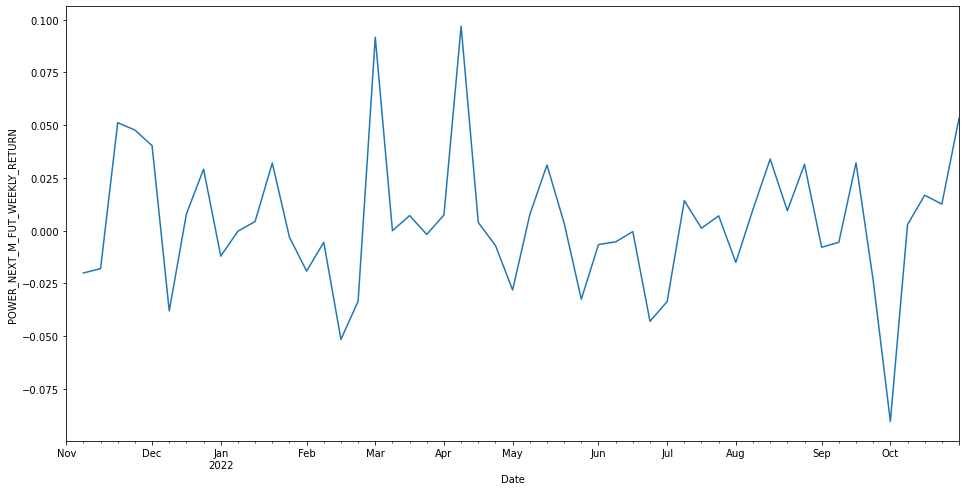

annualized mean: 0.18901431199398616
min: -0.09037814876926971
max: 0.09693682285808533
annualised std dev: 0.23722007905749257


In [71]:
power_next_fut.index = power.index
power_next_fut_weekly = power_next_fut.resample('W-MON').ffill()
power_next_fut_return_weekly  = np.log(power_next_fut_weekly['SETTLE_PR']/power_next_fut_weekly['SETTLE_PR'].shift(1))
power_next_fut_return_weekly.plot(figsize = (16,8))
plt.ylabel("POWER_NEXT_M_FUT_WEEKLY_RETURN")
plt.xlabel('Date')
plt.show()
print('annualized mean: ' + str(power_next_fut_return_weekly.mean()*len(power_next_fut_return_weekly))) 
print('min: ' + str(power_next_fut_return_weekly.min())) 
print('max: ' + str(power_next_fut_return_weekly.max())) 
print('annualised std dev: ' + str(power_next_fut_return_weekly.std() * len(power_next_fut_return_weekly) ** 0.5))


23.72200790574926 %


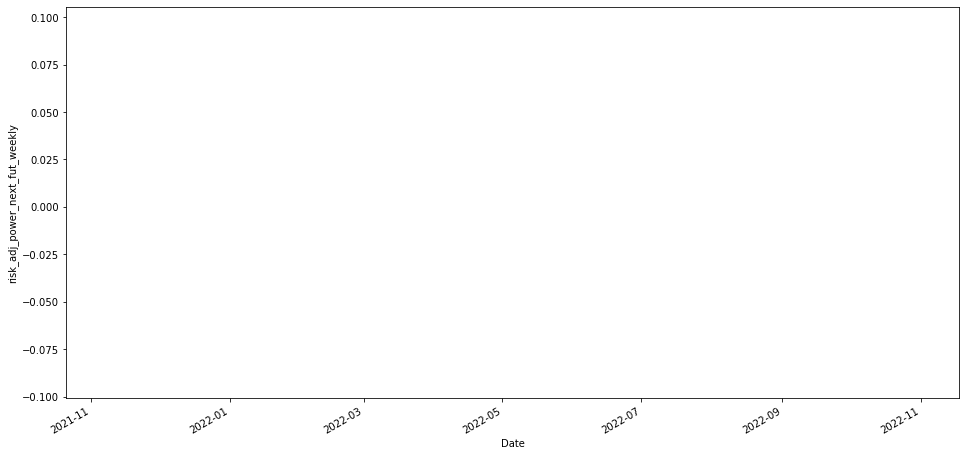

annualized mean: 0.1116787739337333
min: -0.09150645065606217
max: 0.09618210587695325
annualised std dev: 0.5149963469598106
sharpe ratio
0.6036570540727902


In [72]:
power_next_fut_weekly_risk = power_next_fut_return_weekly.std() * len(power_next_fut_return_weekly) ** 0.5 # double star means square root 
print(str(power_next_fut_weekly_risk*100)+' %') 
risk_free_weekly = Rfd/len(power_next_fut_return_weekly)
risk_adj_power_next_fut_weekly = power_next_fut_return_weekly - risk_free_weekly
risk_adj_power_next_fut_weekly.plot(figsize = (16,8))
plt.ylabel("risk_adj_power_next_fut_weekly")
plt.xlabel('Date')
plt.show()
print('annualized mean: '+ str(risk_adj_power_next_fut_weekly.mean()*len(power_weekly_return))) #annualized mean
print('min: ' + str(risk_adj_power_next_fut_weekly.min())) 
print('max: ' + str(risk_adj_power_next_fut_weekly.max()))
print('annualised std dev: ' + str(risk_adj_power_next_fut_weekly.std() * len(risk_adj_power_next_fut_weekly) ** 0.5)) 
reward_risk_ratio_power_next_fut_weekly = (power_next_fut_return_weekly.mean()*len(power_next_fut_return_weekly) - avgRfd)/power_next_fut_weekly_risk 
print('sharpe ratio')
print(reward_risk_ratio_power_next_fut_weekly)

## monthly

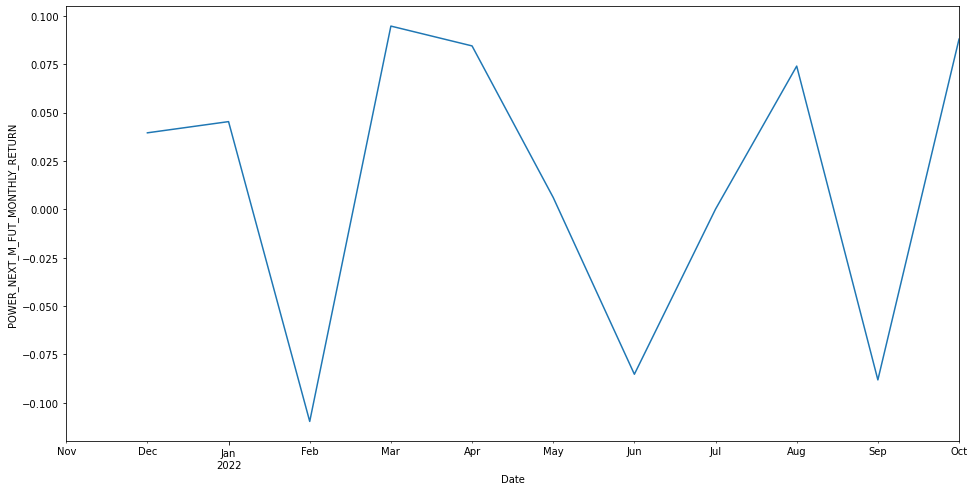

annualized mean: 0.16262281022222447
min: -0.10964116533488306
max: 0.0946889572324766
annualised std dev: 0.2638333371294959


In [73]:
power_next_fut.index = power.index
power_next_fut_monthly = power_next_fut.resample('M').ffill()
power_next_fut_return_monthly  = np.log(power_next_fut_monthly['SETTLE_PR']/power_next_fut_monthly['SETTLE_PR'].shift(1))
power_next_fut_return_monthly.plot(figsize = (16,8))
plt.ylabel("POWER_NEXT_M_FUT_MONTHLY_RETURN")
plt.xlabel('Date')
plt.show()
print('annualized mean: ' + str(power_next_fut_return_monthly.mean()*len(power_next_fut_return_monthly))) 
print('min: ' + str(power_next_fut_return_monthly.min())) 
print('max: ' + str(power_next_fut_return_monthly.max())) 
print('annualised std dev: ' + str(power_next_fut_return_monthly.std() * len(power_next_fut_return_monthly) ** 0.5))

26.383333712949593 %


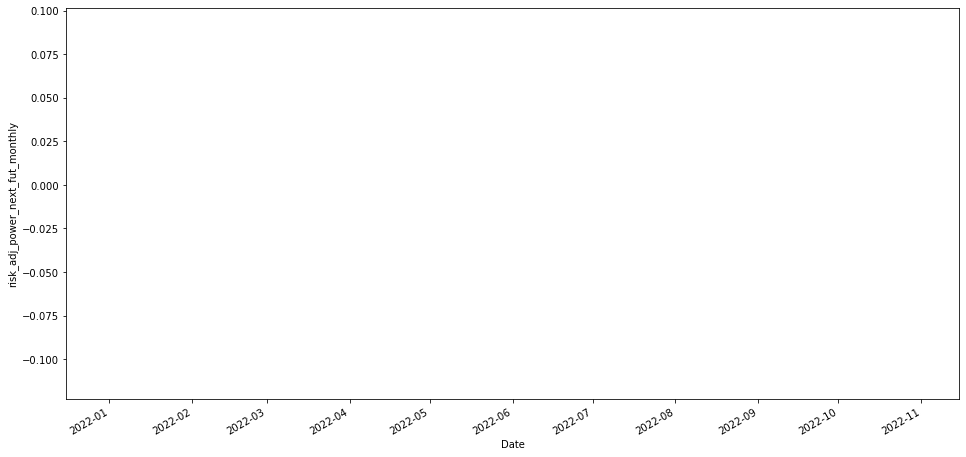

annualized mean: -0.06114814326877247
min: -0.1127494986682164
max: 0.09149729056580994
annualised std dev: 1.3053947750518102
sharpe ratio
0.4427343170119036


In [74]:
power_next_fut_monthly_risk = power_next_fut_return_monthly.std() * len(power_next_fut_return_monthly) ** 0.5 # double star means square root 
print(str(power_next_fut_monthly_risk*100)+' %') 
risk_free_monthly = Rfd/len(power_next_fut_return_monthly)
risk_adj_power_next_fut_monthly = power_next_fut_return_monthly - risk_free_monthly
risk_adj_power_next_fut_monthly.plot(figsize = (16,8))
plt.ylabel("risk_adj_power_next_fut_monthly")
plt.xlabel('Date')
plt.show()
print('annualized mean: '+ str(risk_adj_power_next_fut_monthly.mean()*len(power_monthly_return))) #annualized mean
print('min: ' + str(risk_adj_power_next_fut_monthly.min())) 
print('max: ' + str(risk_adj_power_next_fut_monthly.max()))
print('annualised std dev: ' + str(risk_adj_power_next_fut_monthly.std() * len(risk_adj_power_next_fut_monthly) ** 0.5)) 
reward_risk_ratio_power_next_fut_monthly = (power_next_fut_return_monthly.mean()*len(power_next_fut_return_monthly) - avgRfd)/power_next_fut_monthly_risk 
print('sharpe ratio')
print(reward_risk_ratio_power_next_fut_monthly)

# POWERGRID FAR FUT

In [97]:
power_far_fut = pd.read_excel('POWERGRID.xlsx',sheet_name = 'Far')

## daily

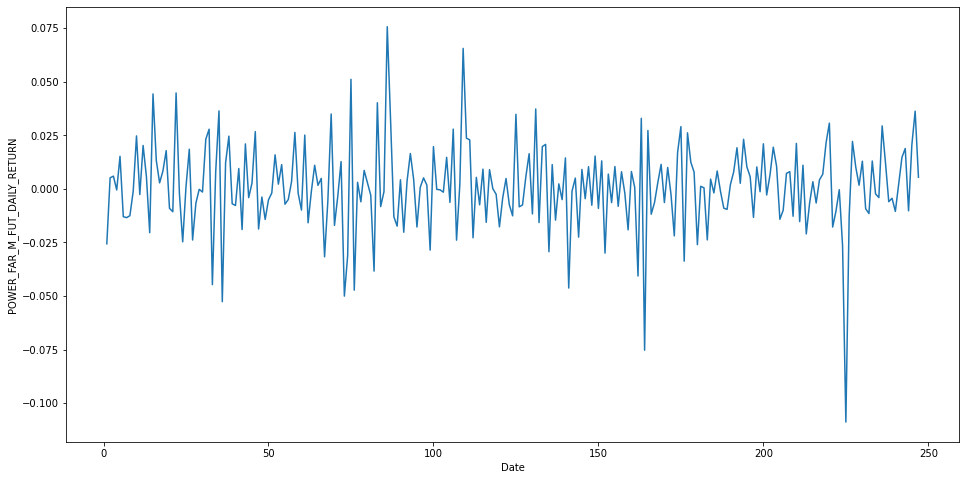

annualized mean: 0.2018683923689507
min: -0.10883571555286825
max: 0.07565485231876293
annualised std dev: 0.32321619822804787


In [76]:
power_far_fut_return_daily  = np.log(power_far_fut['SETTLE_PR']/power_far_fut['SETTLE_PR'].shift(1))
power_far_fut_return_daily.plot(figsize = (16,8))
plt.ylabel("POWER_FAR_M_FUT_DAILY_RETURN")
plt.xlabel('Date')
plt.show()
print('annualized mean: ' + str(power_far_fut_return_daily.mean()*len(power_far_fut_return_daily))) 
print('min: ' + str(power_far_fut_return_daily.min())) 
print('max: ' + str(power_far_fut_return_daily.max())) 
print('annualised std dev: ' + str(power_far_fut_return_daily.std() * len(power_far_fut_return_daily) ** 0.5))


32.321619822804784 %


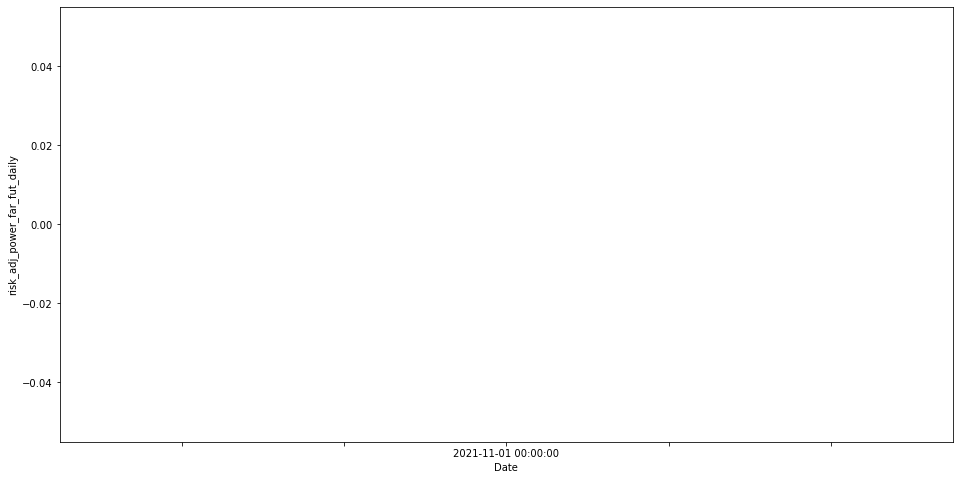

annualized mean: nan
min: nan
max: nan
annualised std dev: nan
sharpe ratio
0.48281507956980535


In [77]:
power_far_fut_daily_risk = power_far_fut_return_daily.std() * len(power_far_fut_return_daily) ** 0.5 # double star means square root 
print(str(power_far_fut_daily_risk*100)+' %') 
risk_free_daily = Rfd/len(power_far_fut_return_daily)
risk_adj_power_far_fut_daily = power_far_fut_return_daily - risk_free_daily
risk_adj_power_far_fut_daily.plot(figsize = (16,8))
plt.ylabel("risk_adj_power_far_fut_daily")
plt.xlabel('Date')
plt.show()
print('annualized mean: '+ str(risk_adj_power_far_fut_daily.mean()*len(power_daily_return))) #annualized mean
print('min: ' + str(risk_adj_power_far_fut_daily.min())) 
print('max: ' + str(risk_adj_power_far_fut_daily.max()))
print('annualised std dev: ' + str(risk_adj_power_far_fut_daily.std() * len(risk_adj_power_far_fut_daily) ** 0.5)) 
reward_risk_ratio_power_far_fut_daily = (power_far_fut_return_daily.mean()*len(power_far_fut_return_daily) - avgRfd)/power_far_fut_daily_risk 
print('sharpe ratio')
print(reward_risk_ratio_power_far_fut_daily)


## weekly

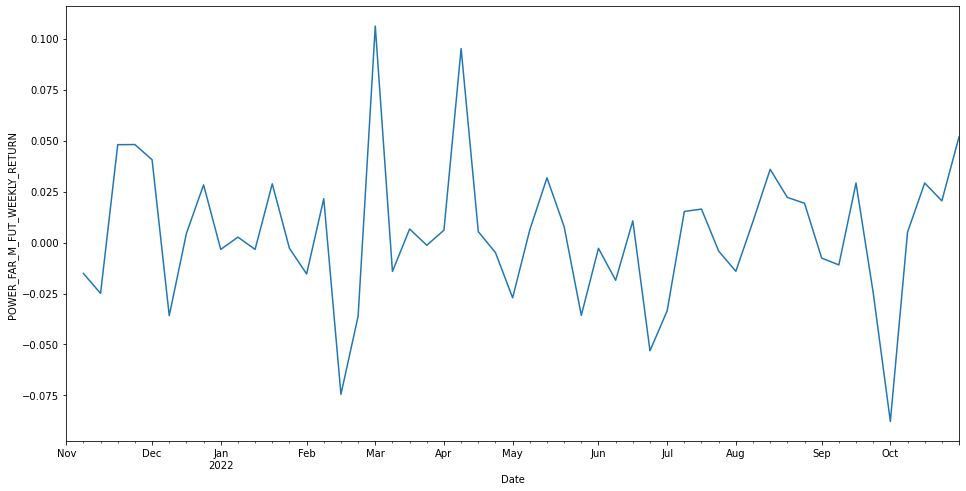

annualized mean: 0.204920837818077
min: -0.08773123304950937
max: 0.1061432945627671
annualised std dev: 0.2524085884953959


In [78]:
power_far_fut.index = power.index
power_far_fut_weekly = power_far_fut.resample('W-MON').ffill()
power_far_fut_return_weekly  = np.log(power_far_fut_weekly['SETTLE_PR']/power_far_fut_weekly['SETTLE_PR'].shift(1))
power_far_fut_return_weekly.plot(figsize = (16,8))
plt.ylabel("POWER_FAR_M_FUT_WEEKLY_RETURN")
plt.xlabel('Date')
plt.show()
print('annualized mean: ' + str(power_far_fut_return_weekly.mean()*len(power_far_fut_return_weekly))) 
print('min: ' + str(power_far_fut_return_weekly.min())) 
print('max: ' + str(power_far_fut_return_weekly.max())) 
print('annualised std dev: ' + str(power_far_fut_return_weekly.std() * len(power_far_fut_return_weekly) ** 0.5))

25.24085884953959 %


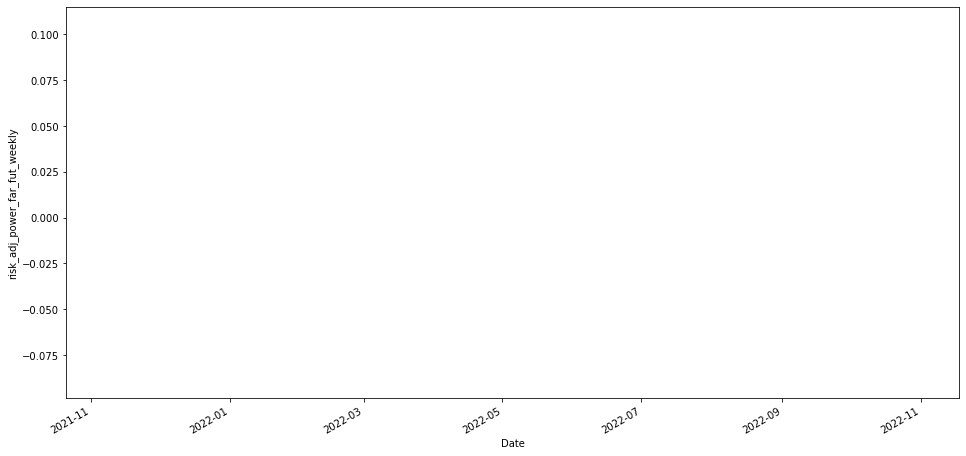

annualized mean: 0.12583819647616493
min: -0.08885953493630183
max: 0.10542065305333313
annualised std dev: 0.5479687070908363
sharpe ratio
0.6303513714144217


In [79]:
power_far_fut_weekly_risk = power_far_fut_return_weekly.std() * len(power_far_fut_return_weekly) ** 0.5 # double star means square root 
print(str(power_far_fut_weekly_risk*100)+' %') 
risk_free_weekly = Rfd/len(power_far_fut_return_weekly)
risk_adj_power_far_fut_weekly = power_far_fut_return_weekly - risk_free_weekly
risk_adj_power_far_fut_weekly.plot(figsize = (16,8))
plt.ylabel("risk_adj_power_far_fut_weekly")
plt.xlabel('Date')
plt.show()
print('annualized mean: '+ str(risk_adj_power_far_fut_weekly.mean()*len(power_weekly_return))) #annualized mean
print('min: ' + str(risk_adj_power_far_fut_weekly.min())) 
print('max: ' + str(risk_adj_power_far_fut_weekly.max()))
print('annualised std dev: ' + str(risk_adj_power_far_fut_weekly.std() * len(risk_adj_power_far_fut_weekly) ** 0.5)) 
reward_risk_ratio_power_far_fut_weekly = (power_far_fut_return_weekly.mean()*len(power_far_fut_return_weekly) - avgRfd)/power_far_fut_weekly_risk 
print('sharpe ratio')
print(reward_risk_ratio_power_far_fut_weekly)


## monthly

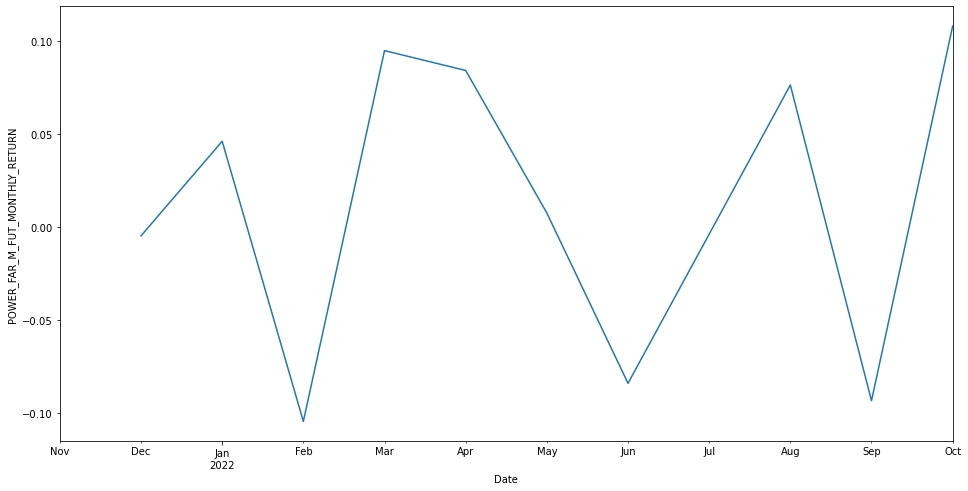

annualized mean: 0.13889829555721542
min: -0.10449875055298456
max: 0.10814576524940989
annualised std dev: 0.27077747052923323


In [80]:
power_far_fut.index = power.index
power_far_fut_monthly = power_far_fut.resample('M').ffill()
power_far_fut_return_monthly  = np.log(power_far_fut_monthly['SETTLE_PR']/power_far_fut_monthly['SETTLE_PR'].shift(1))
power_far_fut_return_monthly.plot(figsize = (16,8))
plt.ylabel("POWER_FAR_M_FUT_MONTHLY_RETURN")
plt.xlabel('Date')
plt.show()
print('annualized mean: ' + str(power_far_fut_return_monthly.mean()*len(power_far_fut_return_monthly))) 
print('min: ' + str(power_far_fut_return_monthly.min())) 
print('max: ' + str(power_far_fut_return_monthly.max())) 
print('annualised std dev: ' + str(power_far_fut_return_monthly.std() * len(power_far_fut_return_monthly) ** 0.5))

27.077747052923325 %


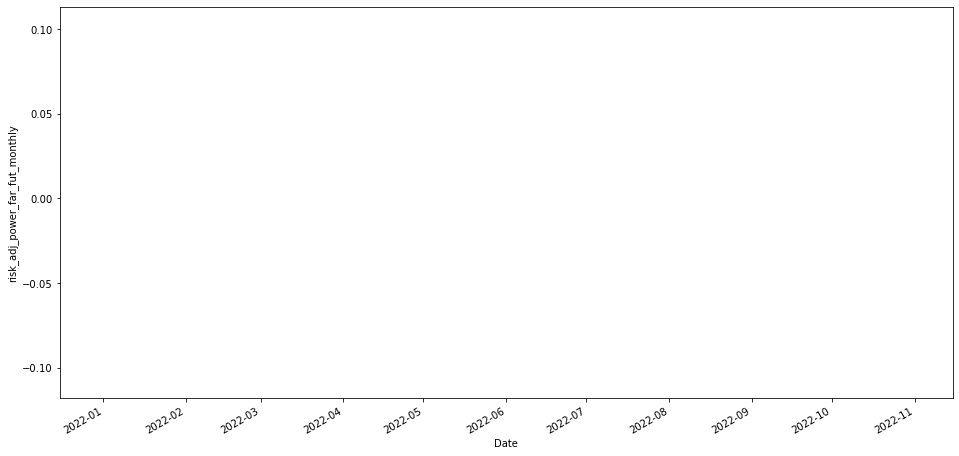

annualized mean: -0.09134560896384097
min: -0.1076070838863179
max: 0.10277909858274321
annualised std dev: 1.3323485172612093
sharpe ratio
0.3437640416392777


In [81]:
power_far_fut_monthly_risk = power_far_fut_return_monthly.std() * len(power_far_fut_return_monthly) ** 0.5 # double star means square root 
print(str(power_far_fut_monthly_risk*100)+' %') 
risk_free_monthly = Rfd/len(power_far_fut_return_monthly)
risk_adj_power_far_fut_monthly = power_far_fut_return_monthly - risk_free_monthly
risk_adj_power_far_fut_monthly.plot(figsize = (16,8))
plt.ylabel("risk_adj_power_far_fut_monthly")
plt.xlabel('Date')
plt.show()
print('annualized mean: '+ str(risk_adj_power_far_fut_monthly.mean()*len(power_monthly_return))) #annualized mean
print('min: ' + str(risk_adj_power_far_fut_monthly.min())) 
print('max: ' + str(risk_adj_power_far_fut_monthly.max()))
print('annualised std dev: ' + str(risk_adj_power_far_fut_monthly.std() * len(risk_adj_power_far_fut_monthly) ** 0.5)) 
reward_risk_ratio_power_far_fut_monthly = (power_far_fut_return_monthly.mean()*len(power_far_fut_return_monthly) - avgRfd)/power_far_fut_monthly_risk 
print('sharpe ratio')
print(reward_risk_ratio_power_far_fut_monthly)

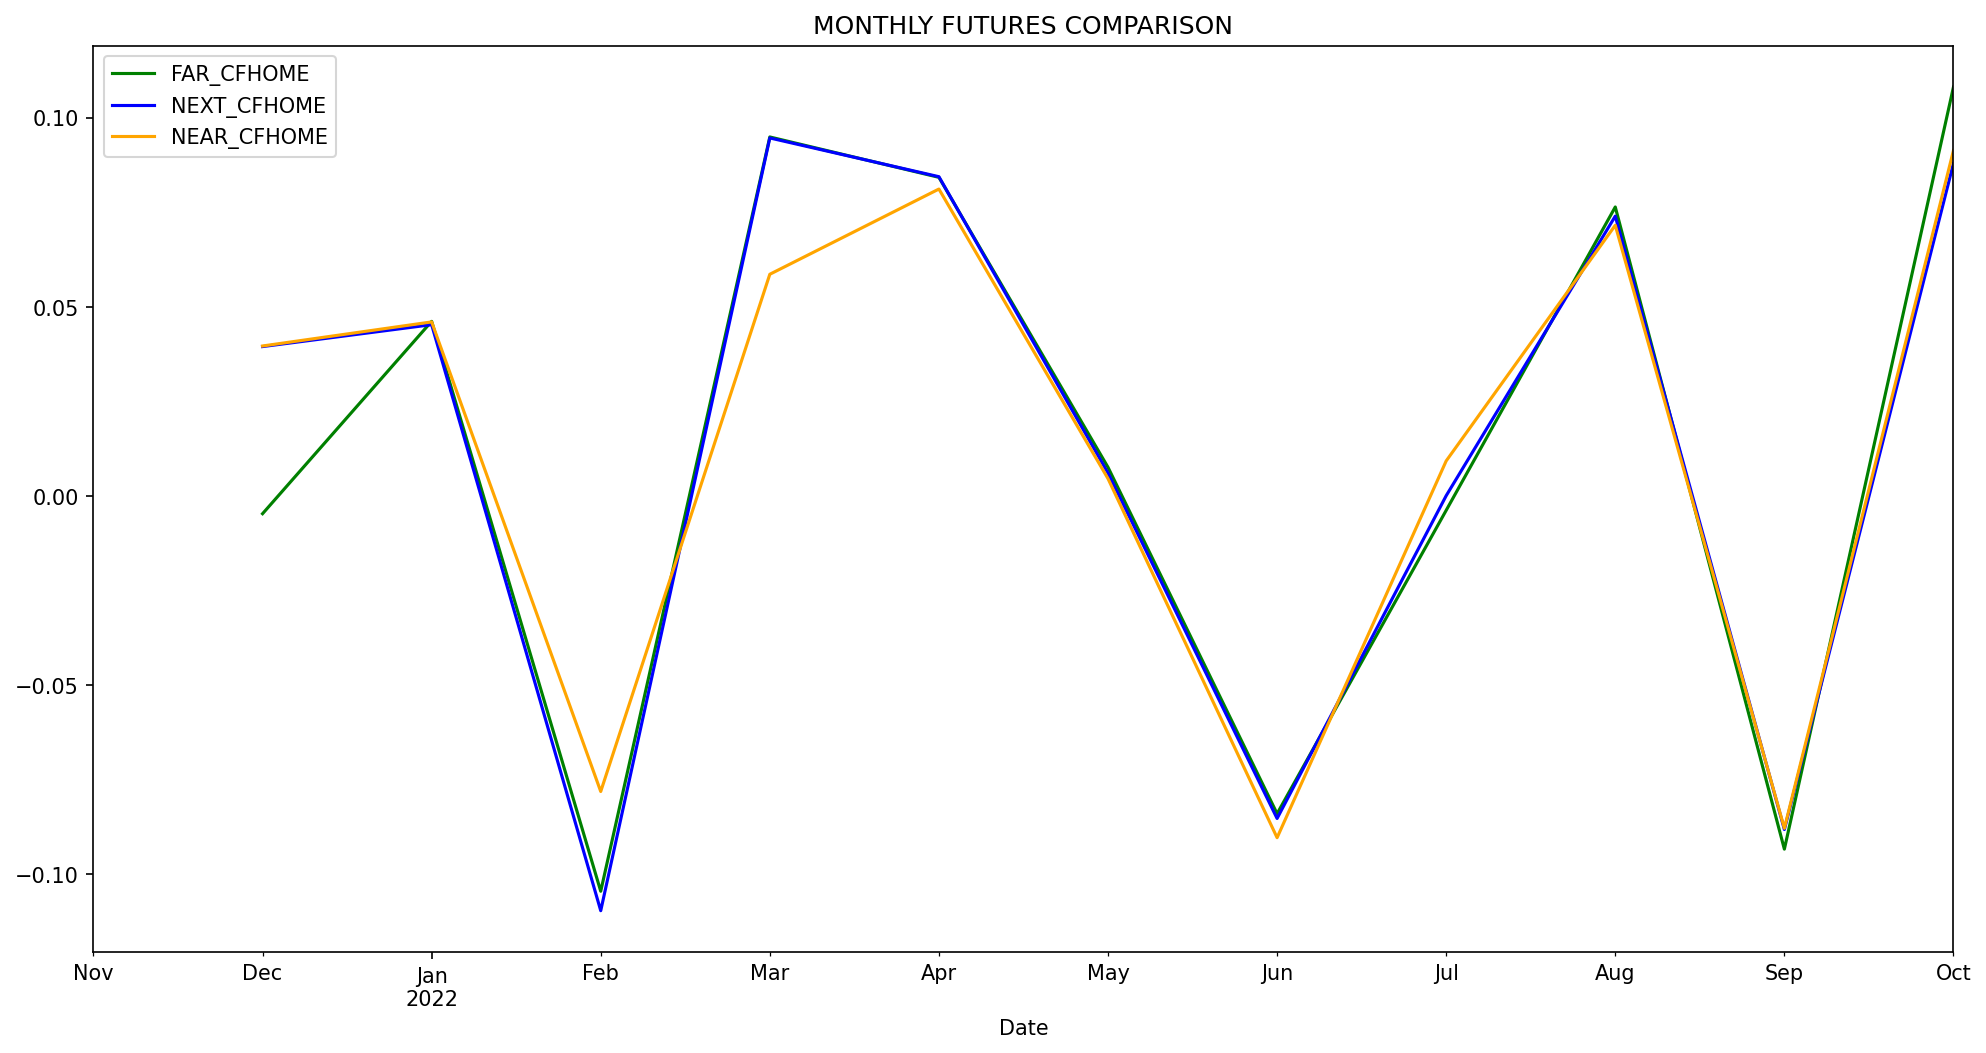

In [82]:
plt.figure(figsize = (16,8), dpi = 150)
power_far_fut_return_monthly.plot(label='FAR_CFHOME', color='green')
power_next_fut_return_monthly.plot(label='NEXT_CFHOME', color='blue')
power_near_fut_return_monthly.plot(label='NEAR_CFHOME', color='orange')
plt.title('MONTHLY FUTURES COMPARISON')
plt.legend()

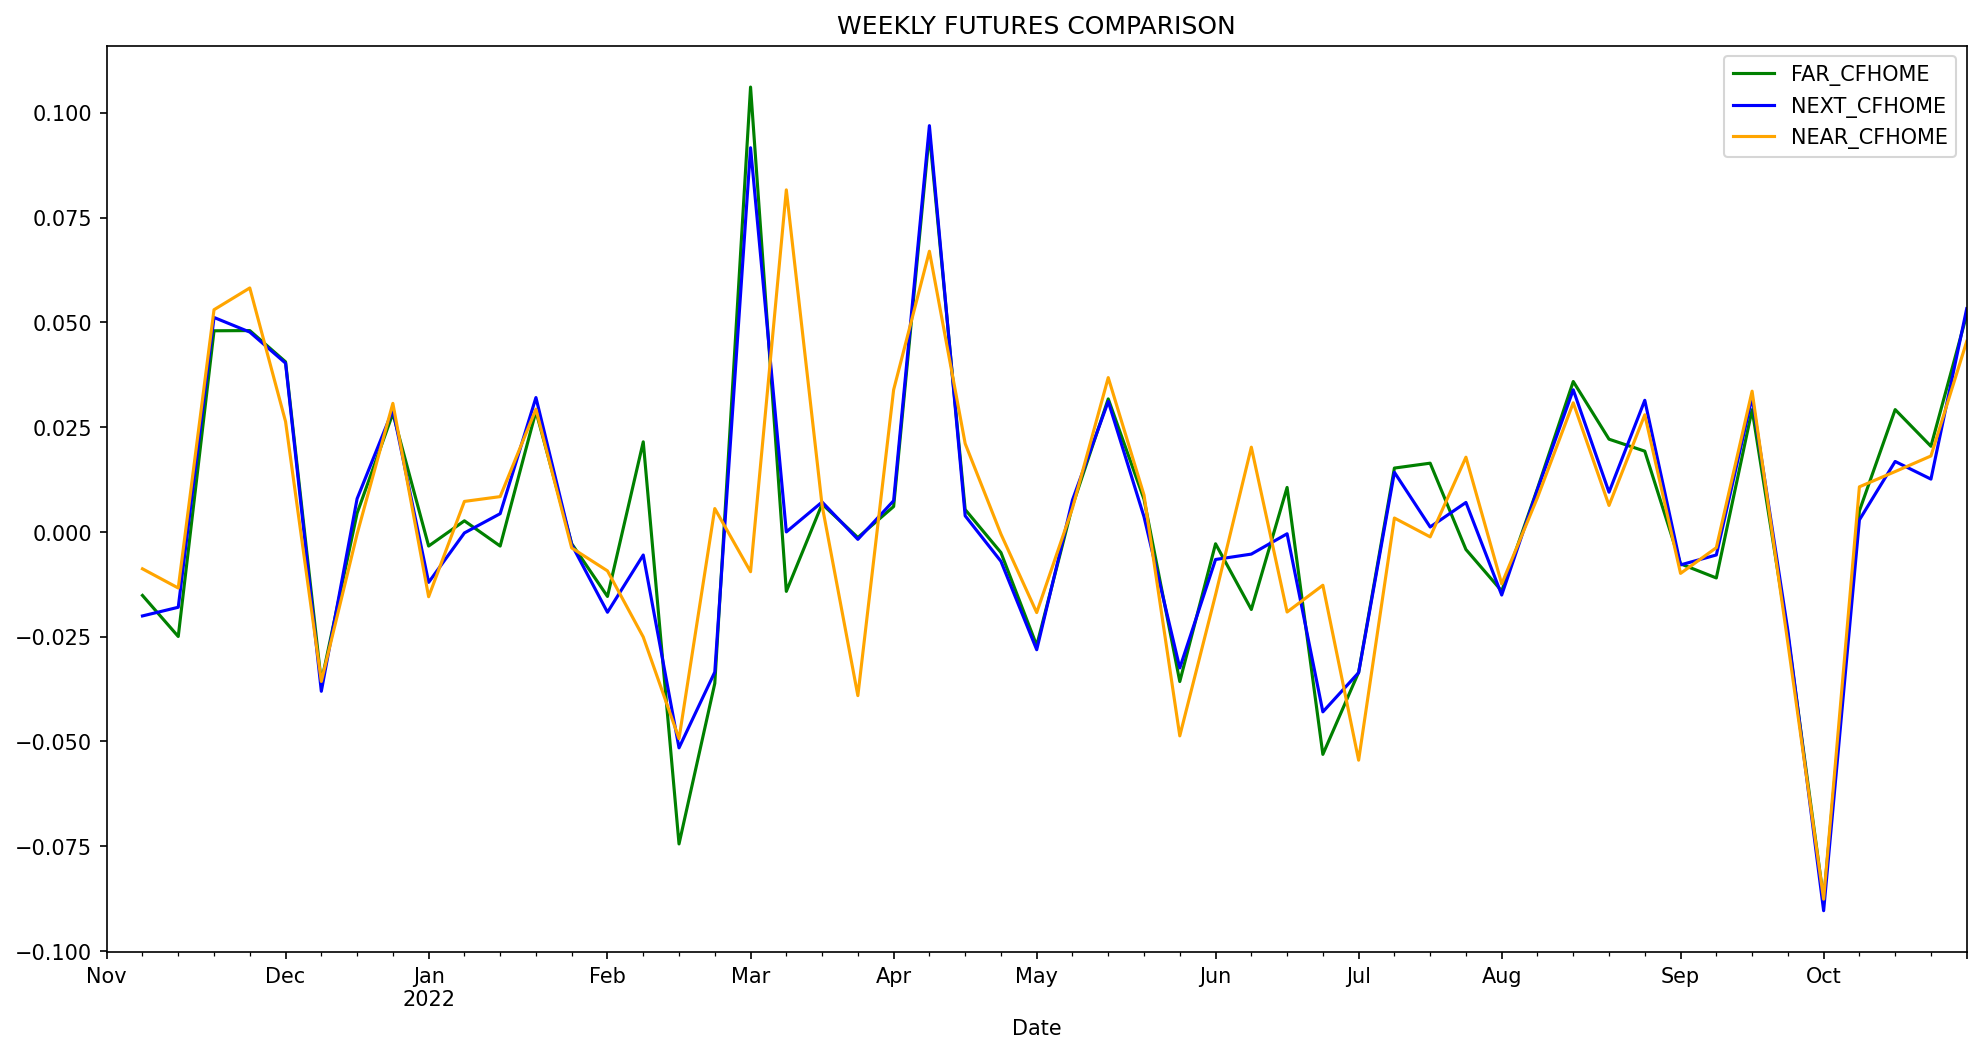

In [83]:
plt.figure(figsize = (16,8), dpi = 150)
power_far_fut_return_weekly.plot(label='FAR_CFHOME', color='green')
power_next_fut_return_weekly.plot(label='NEXT_CFHOME', color='blue')
power_near_fut_return_weekly.plot(label='NEAR_CFHOME', color='orange')
plt.title('WEEKLY FUTURES COMPARISON')
plt.legend()

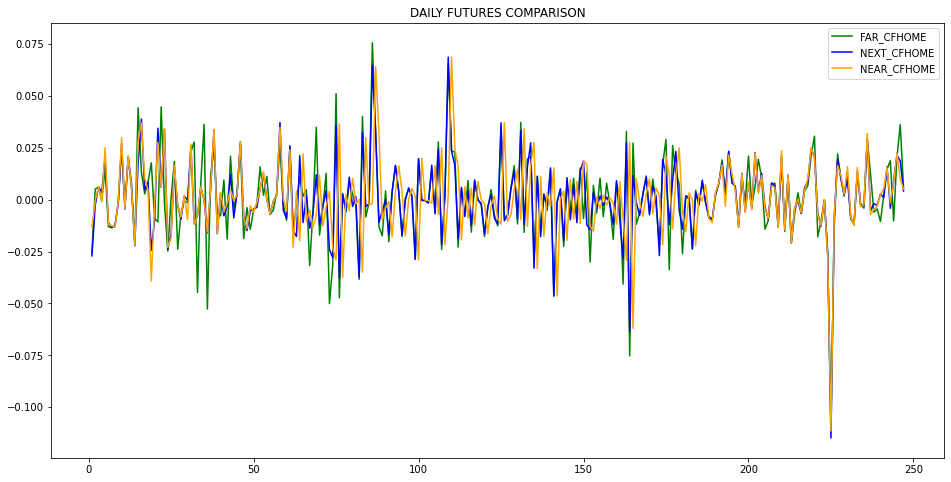

In [84]:
plt.figure(figsize = (16,8),)
power_far_fut_return_daily.plot(label='FAR_CFHOME', color='green')
power_next_fut_return_daily.plot(label='NEXT_CFHOME', color='blue')
power_near_fut_return_daily.plot(label='NEAR_CFHOME', color='orange')
plt.title('DAILY FUTURES COMPARISON')
plt.legend()

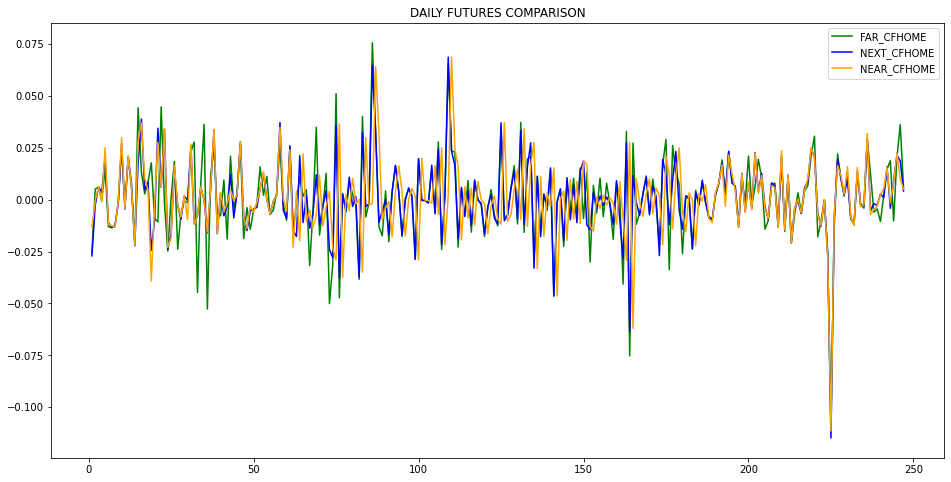

In [85]:
plt.figure(figsize = (16,8),)
power_far_fut_return_daily.plot(label='FAR_CFHOME', color='green')
power_next_fut_return_daily.plot(label='NEXT_CFHOME', color='blue')
power_near_fut_return_daily.plot(label='NEAR_CFHOME', color='orange')
plt.title('DAILY FUTURES COMPARISON')
plt.legend()

In [102]:
power_stock_vol = power['Volume']


Text(0, 0.5, 'VOL IN 1 MILLION')

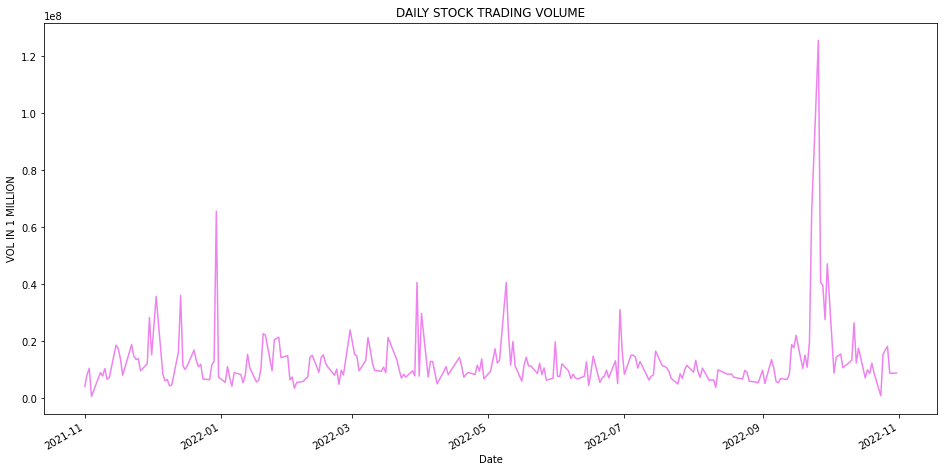

In [109]:
power_stock_vol.plot(figsize = (16,8), color = 'violet')
plt.title('DAILY STOCK TRADING VOLUME')
plt.ylabel('VOL IN 1 MILLION')

In [100]:
power_near_volume = power_near_fut ['CONTRACTS'] 
power_next_volume = power_next_fut ['CONTRACTS']
power_far_volume = power_far_fut ['CONTRACTS']

Text(0, 0.5, 'Volume')

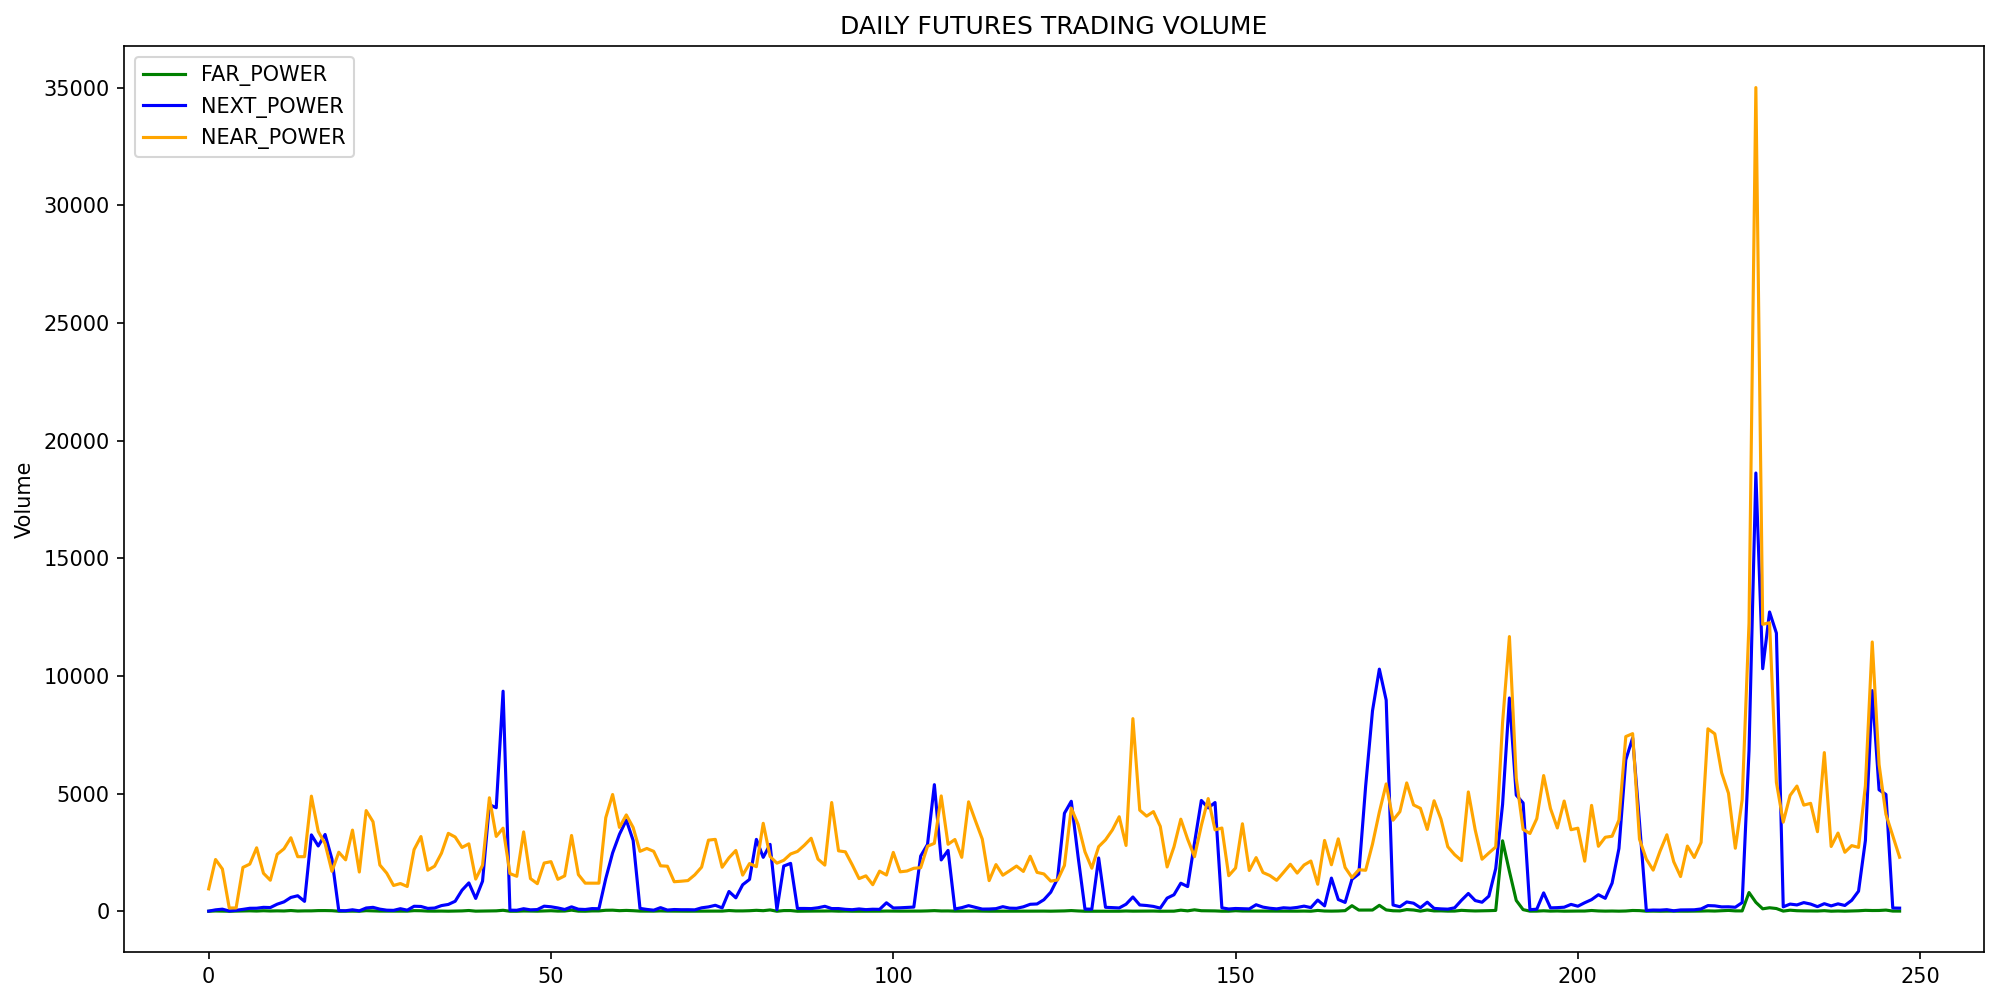

In [101]:
plt.figure(figsize = (16,8), dpi = 150)
power_far_volume.plot(label='FAR_POWER', color='green')
power_next_volume.plot(label='NEXT_POWER', color='blue')
power_near_volume.plot(label='NEAR_POWER', color='orange')
plt.title('DAILY FUTURES TRADING VOLUME')
plt.legend()
plt.ylabel('Volume')

# REGRESSION ANALYSIS

In [86]:
index= pd.DataFrame()
df2 = wb.DataReader('^NSEI','yahoo',start ='2021-11-01', end = '2022-10-31')
index['^NSEI'] = df2['Adj Close']
index_return = np.log(index/index.shift(1))
index_return = index_return.dropna(axis=0)
index_return.mean()*len(index_return)

^NSEI    0.004593
dtype: float64

## CANFINHOME

In [87]:
cfhome_daily_return= cfhome_daily_return.dropna(axis=0)
returns = pd.merge(index_return, cfhome_daily_return,how='inner',on='Date') 
x = index_return
y = cfhome_daily_return
x_sm = sm.add_constant(x)
model = sm.OLS(y,x_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     147.8
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           6.33e-27
Time:                        17:49:12   Log-Likelihood:                 614.46
No. Observations:                 247   AIC:                            -1225.
Df Residuals:                     245   BIC:                            -1218.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.001     -0.616      0.539      -0.003       0.002
^NSEI          1.3724      0.113     12.158      0.000       1.150       1.595
==============================================================================
Omnibus:                       20.865   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.208
Skew:                           0.114   Prob(JB):                     4.66e-17
Kurtosis:                       5.694   Cond. No.                         87.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## POWERGRID

In [88]:
power_daily_return= power_daily_return.dropna(axis=0)
returns = pd.merge(index_return, power_daily_return,how='inner',on='Date') 
x = index_return
y = power_daily_return
x_sm = sm.add_constant(x)
model = sm.OLS(y,x_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     28.08
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           2.59e-07
Time:                        17:49:12   Log-Likelihood:                 671.65
No. Observations:                 247   AIC:                            -1339.
Df Residuals:                     245   BIC:                            -1332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      0.971      0.332      -0.001       0.003
^NSEI          0.4745      0.090      5.299      0.000       0.298       0.651
==============================================================================
Omnibus:                       16.188   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.891
Skew:                           0.022   Prob(JB):                     3.99e-11
Kurtosis:                       5.157   Cond. No.                         87.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

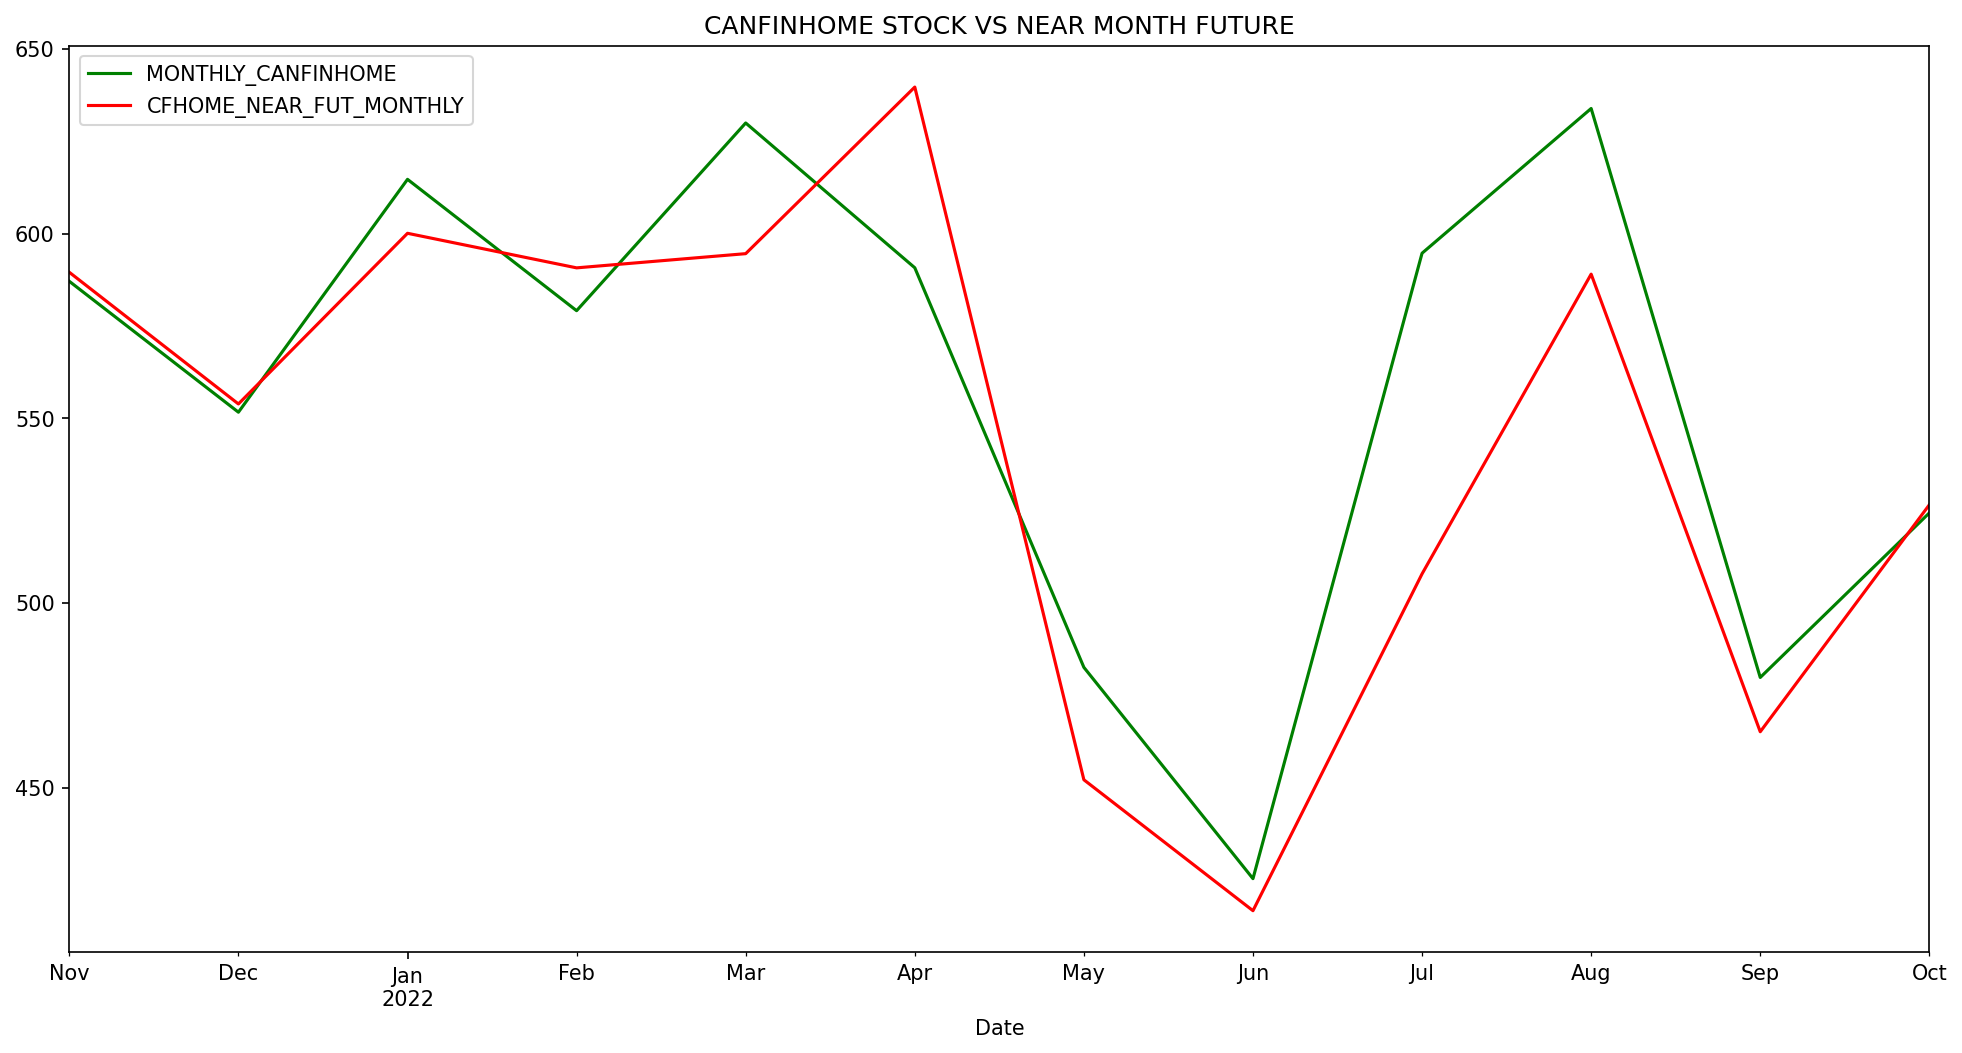

In [89]:
plt.figure(figsize=(16, 8), dpi=150)
cfhome_monthly.plot(label='MONTHLY_CANFINHOME', color='green')
cfhome_near_fut_monthly['SETTLE_PR'].plot(label='CFHOME_NEAR_FUT_MONTHLY', color = 'red')
plt.title('CANFINHOME STOCK VS NEAR MONTH FUTURE')
plt.legend()

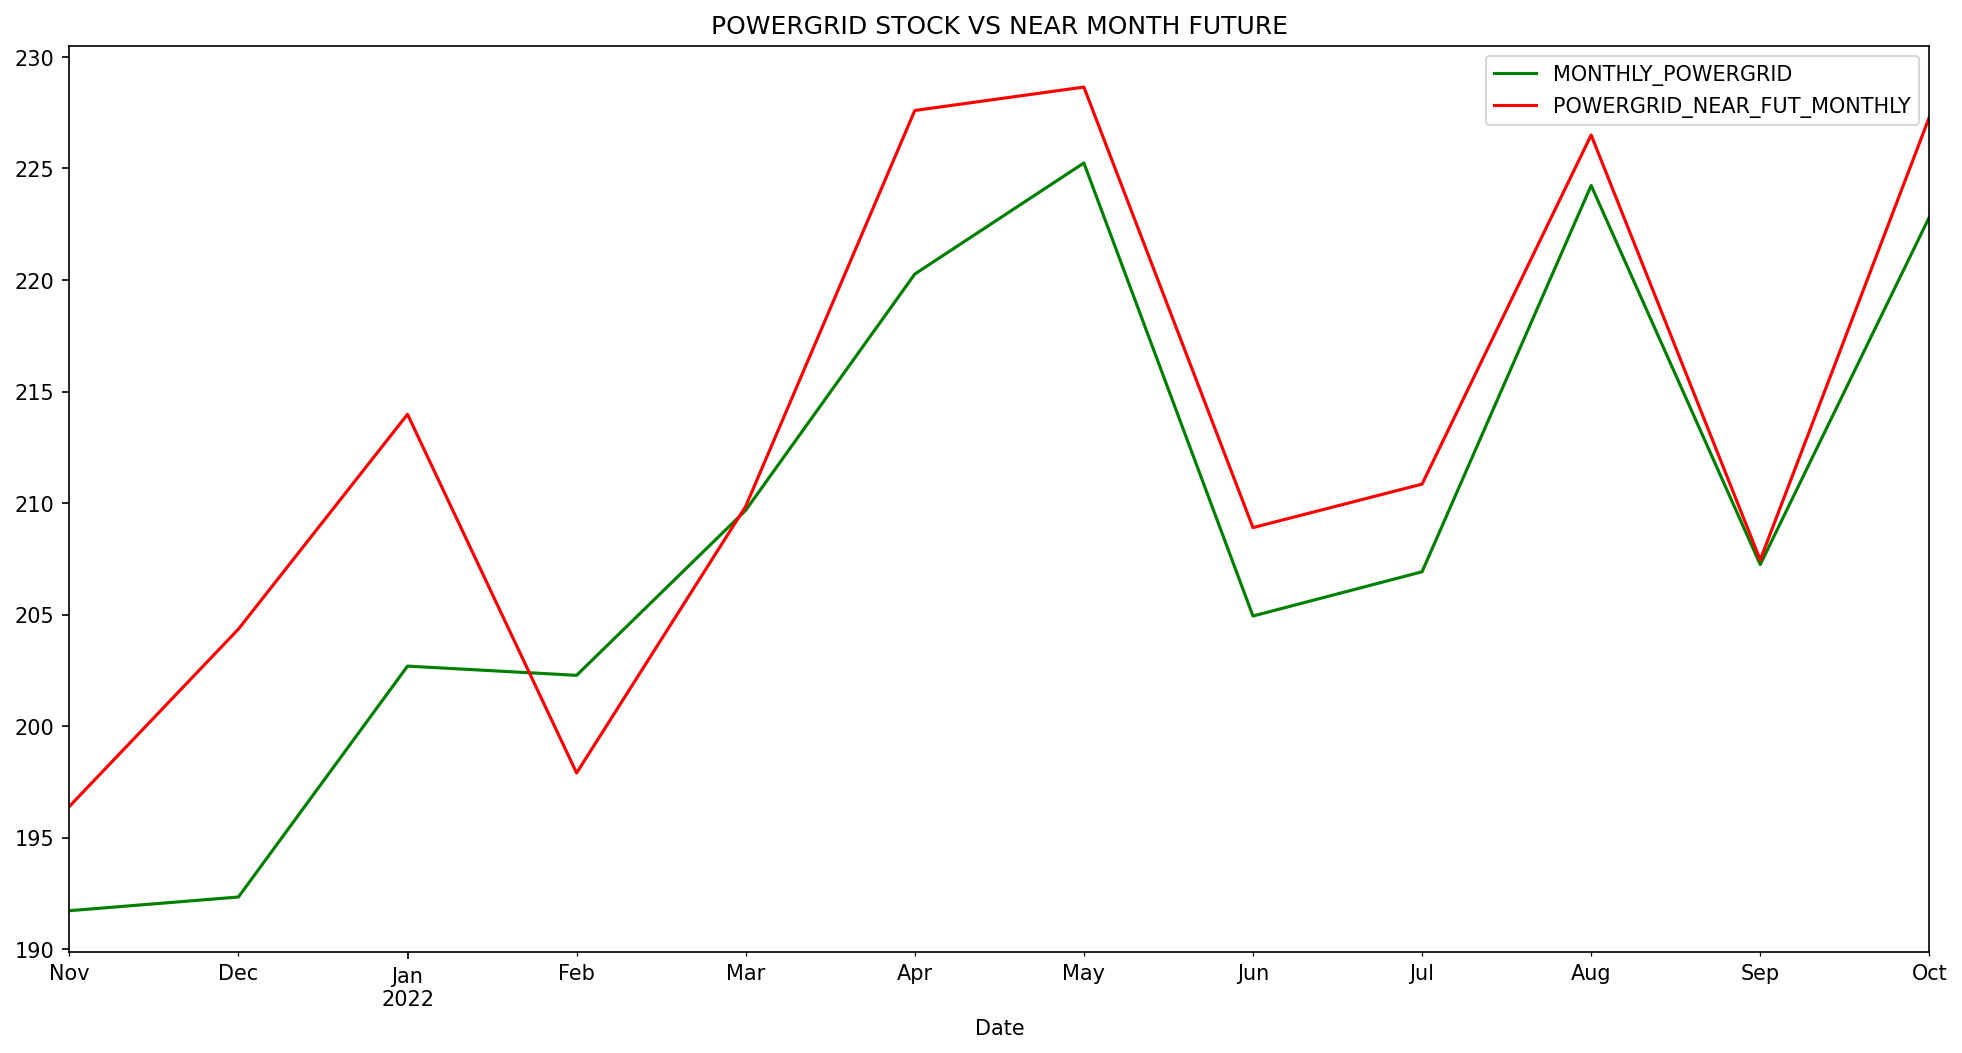

In [90]:
plt.figure(figsize=(16, 8), dpi=150)
power_monthly.plot(label='MONTHLY_POWERGRID', color='green')
power_near_fut_monthly['SETTLE_PR'].plot(label='POWERGRID_NEAR_FUT_MONTHLY', color = 'red')
plt.title('POWERGRID STOCK VS NEAR MONTH FUTURE')
plt.legend()